# Youtube Video Views Prediction

### Import Libraries and Settings

In [70]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 100
# pd.set_option('display.max_colwidth', None) #This one is used only to see the text features
# pd.set_option('display.float_format', '{:.15f}'.format)

# Requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.0
seaborn version :  0.13.2


#### Load Dataset (Jupyter Notebook)

In [71]:
# pip install openpyxl

In [72]:
df = pd.read_excel('youtube_statistics.xlsx')

#### Load Dataset (Google Colab)

In [73]:
# from google.colab import drive
# drive.mount('/content/drive')

In [74]:
# df = pd.read_excel('/content/drive/MyDrive/Google Drive/youtube_statistics.xlsx')

# Initial Data Understanding and Pre-Processing

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

Features Description :

- **trending_date:** Date when the video is trending.
- **title:** Video title.
- **channel_title:** Channel name.
- **category_id:** Video category in label encoding.
- **publish_time:** Video publishing time.
- **tags:** Tags used in the video.
- **views:** Number of video views.
- **likes:** Number of video likes.
- **dislikes:** Number of video dislikes.
- **comment_count:** Number of comments on the video.
- **comments_disabled:** Indicates whether comments are disabled for the video.
- **ratings_disabled:** Indicates whether ratings are disabled for the video.
- **video_error_or_removed:** Indicates whether the video is currently in error or has been removed.
- **description:** Video description.
- **No_tags:** Number of tags used.
- **desc_len:** Length of the video description in terms of words.
- **len_title:** Length of the video title in terms of words.
- **publish_date:** Date when the video was published.

In [76]:
df.sample(10)

trending_date                                              title  \
12654    2018-01-23  Real Madrid vs Deportivo La Coruna 7-1 - All G...   
23238    2018-03-26                       Naayagi Episode 30, 24/03/18   
34989    2018-06-04               STERLITE- மெய்ப்பொருள் காண்பது அறிவு   
11098    2018-01-14    Trump ACTUALLY Called These Countries S**tholes   
24307    2018-04-01  Extra Jabardasth | 6th April 2018 | Extra Jaba...   
693      2017-11-17  Infinix Zero 5 Unboxing | Surprise For You All...   
6252     2017-12-17                EIC: The Trump and Kim Jong Un Song   
17948    2018-02-22  నిన్న ఇంట్లో పెళ్లి బాజాలు ఈ రోజు రెడ్ హ్యాండె...   
19125    2018-03-01  Baaghi 2: Mundiyan Song | Tiger Shroff, Disha ...   
7692     2017-12-25  Latest Punjabi Songs 2017 | Oh Girl(Full Song)...   

                      channel_title  category_id publish_time  \
12654                     GOLAZO TV           17     17:14:04   
23238                     VikatanTV           24     15:00:03   
34989  Lets Make Engineering Simple           27     17:49:00   
11098             Jimmy Kimmel Live           23     02:51:31   
24307                   mallemalatv           24     18:43:32   
693              Sharmaji Technical           28     12:51:33   
6252              East India Comedy           23     14:00:00   
17948                   Gossip Adda           24     11:58:35   
19125                      T-Series           10     05:36:47   
7692           Leinster Productions           10     12:52:37   

                                                    tags    views  likes  \
12654  Real Madrid|"vs"|"Deportivo La Coruna"|"7-1"|"...  2503420  17252   
23238  Naayagi Episode 30|"Naayagi 24/03/18"|"Naayagi...   612842   2688   
34989  sterlite|"ban sterlite"|"vv industries"|"what ...   529146  48609   
11098  jimmy|"jimmy kimmel"|"jimmy kimmel live"|"late...  2583424  25747   
24307  Mallemalatv|"Comedy Videos in Telugu"|"All Tim...   937621   6579   
693    sharmaji technical|"hindi review"|"infinix"|"z...   151713  27113   
6252   Comedy|"East"|"India"|"Sorabh"|"Pant"|"Sapan"|...   178638  12158   
17948  gossips|"gossip adda"|"tollywood"|"tollywood n...   178866    371   
19125  Mundiyan To Bach Ke Rahi|"ke"|"bach"|"Mundiyan...  1933869  62200   
7692   Latest Punjabi Songs 2017 | Oh Girl(Full Song)...   921797  10512   

       dislikes  comment_count  comments_disabled  ratings_disabled  \
12654      1482           4010              False             False   
23238       510            310              False             False   
34989       505           5521              False             False   
11098      7267          15274              False             False   
24307       386            370              False             False   
693         411          19692              False             False   
6252        532            549              False             False   
17948       151             34              False             False   
19125      5898           3655              False             False   
7692       1673            713              False             False   

       video_error_or_removed  \
12654                   False   
23238                   False   
34989                   False   
11098                   False   
24307                   False   
693                     False   
6252                    False   
17948                   False   
19125                   False   
7692                    False   

                                             description  No_tags  desc_len  \
12654  Real Madrid vs Deportivo La Coruna 7-1 - All G...       22      2135   
23238  Naayagi Episode 30\nSubscribe: https://goo.gl/...       10       201   
34989  Sterlite - மெய்ப்பொருள் காண்பது அறிவு To know ...        7       164   
11098  Donald Trump had a preposterous day which star...       28      2150   
24307  Watch Extra Jabardasth Latest Promo 6th April ...       19       515   
693    In this vid

Just from these information, there are some useful insight to this data that understanding it could make it easier for further analysis and feature transformation, they are :

- trending_date feature have the wrong format should be in datetime instead of object, the publish_date already got the correct dtype. Regarding the publish_time, I personally think it would be useful to have more information, such as the number of views tracked over time, so that we can observe the movement of views at each point in time (time-series analysis). Currently, we can only see the start point (publish_date) and end point (trending_date)
- Video category (category_id) is displayed as a labelled number already, so we are quite unsure what the details of each video like which one is Gaming, Music Videos, News and Politics, etc
- title, tags, and description are quite interesting to play around in text mining though it will be quite challenging in separating the english and indian texts
- As for boolean feature like comments_disabled, ratings_disabled, video_error_or_removed potentially could be encoded by one-hot enxoding since they are nominal values
- channel_title most likely if we want to use it, will be done through frequency/count encoding
- Feature views is the target variable, we could move it to the last order in dataframe (personal preference)

In [77]:
# Re-arrange the columns (views in last)
df_1 = df.drop(columns='views')
df_2 = df['views']
df = pd.concat([df_1, df_2], axis='columns')

In [78]:
#Checking missing values
df.isna().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
views                      0
dtype: int64

In [79]:
#Drop missing values
df = df.drop_duplicates()

In [80]:
#Checking amount of duplicated values
df.duplicated().sum()

0

# Descriptive Statistics

In [81]:
#Grouping columns based on their types
nums = ['likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title', 'category_id', 'views']
cats = ['title', 'channel_title', 'tags','description']
date = ['trending_date', 'publish_date','publish_time']
bool = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']

print("Numeric Columns:")
print(list(nums))

print("\nCategorical Columns:")
print(list(cats))

print("\nDate/Time Columns:")
print(list(date))

print("\nBoolean Columns:")
print(list(bool))

Numeric Columns:
['likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title', 'category_id', 'views']

Categorical Columns:
['title', 'channel_title', 'tags', 'description']

Date/Time Columns:
['trending_date', 'publish_date', 'publish_time']

Boolean Columns:
['comments_disabled', 'ratings_disabled', 'video_error_or_removed']


In [82]:
#Describe numerical columns
df[nums].describe().transpose()

count          mean           std     min        25%  \
likes          32562.0  2.595444e+04  9.720113e+04     0.0     800.00   
dislikes       32562.0  1.596781e+03  1.703103e+04     0.0      99.00   
comment_count  32562.0  2.561673e+03  1.488591e+04     0.0      74.00   
No_tags        32562.0  1.884906e+01  9.863164e+00     1.0      12.00   
desc_len       32562.0  9.132707e+02  8.070886e+02     3.0     366.00   
len_title      32562.0  7.099567e+01  2.228042e+01     5.0      54.00   
category_id    32562.0  2.160242e+01  6.525405e+00     1.0      23.00   
views          32562.0  1.007091e+06  3.171556e+06  4024.0  114162.25   

                    50%       75%          max  
likes            2817.0   12299.0    2912710.0  
dislikes          293.0     943.0    1545017.0  
comment_count     306.0    1188.0     827755.0  
No_tags            19.0      25.0         72.0  
desc_len          673.0    1226.0       5136.0  
len_title          75.0      91.0        100.0  
category_id        24.0      24.0         43.0  
views          277788.0  738924.5  125432237.0

In [83]:
#Describe categorical columns
df[cats].describe().transpose()

count unique  \
title          32562  16431   
channel_title  32562   1390   
tags           32562  12463   
description    32518  13979   

                                                             top  freq  
title                           Nandhini | Today @ 9 pm | Sun TV    15  
channel_title                                          VikatanTV   208  
tags                                                      [none]  1027  
description    Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...   150

In [84]:
#Describe boolean columns
df[bool].describe().transpose()

count unique    top   freq
comments_disabled       32562      2  False  31478
ratings_disabled        32562      2  False  31873
video_error_or_removed  32562      2  False  32553

In [85]:
#Describe date columns
df[date].describe().transpose()

count                           mean                  min  \
publish_date  32562  2018-02-16 23:35:27.363183872  2017-05-27 00:00:00   

                              25%                  50%                  75%  \
publish_date  2017-12-25 00:00:00  2018-02-12 00:00:00  2018-04-12 00:00:00   

                              max  
publish_date  2018-06-13 00:00:00

# Univariate Analysis

## Numerical Columns

In [86]:
#Check number of subplots that will be make
len(df[nums].columns)

8

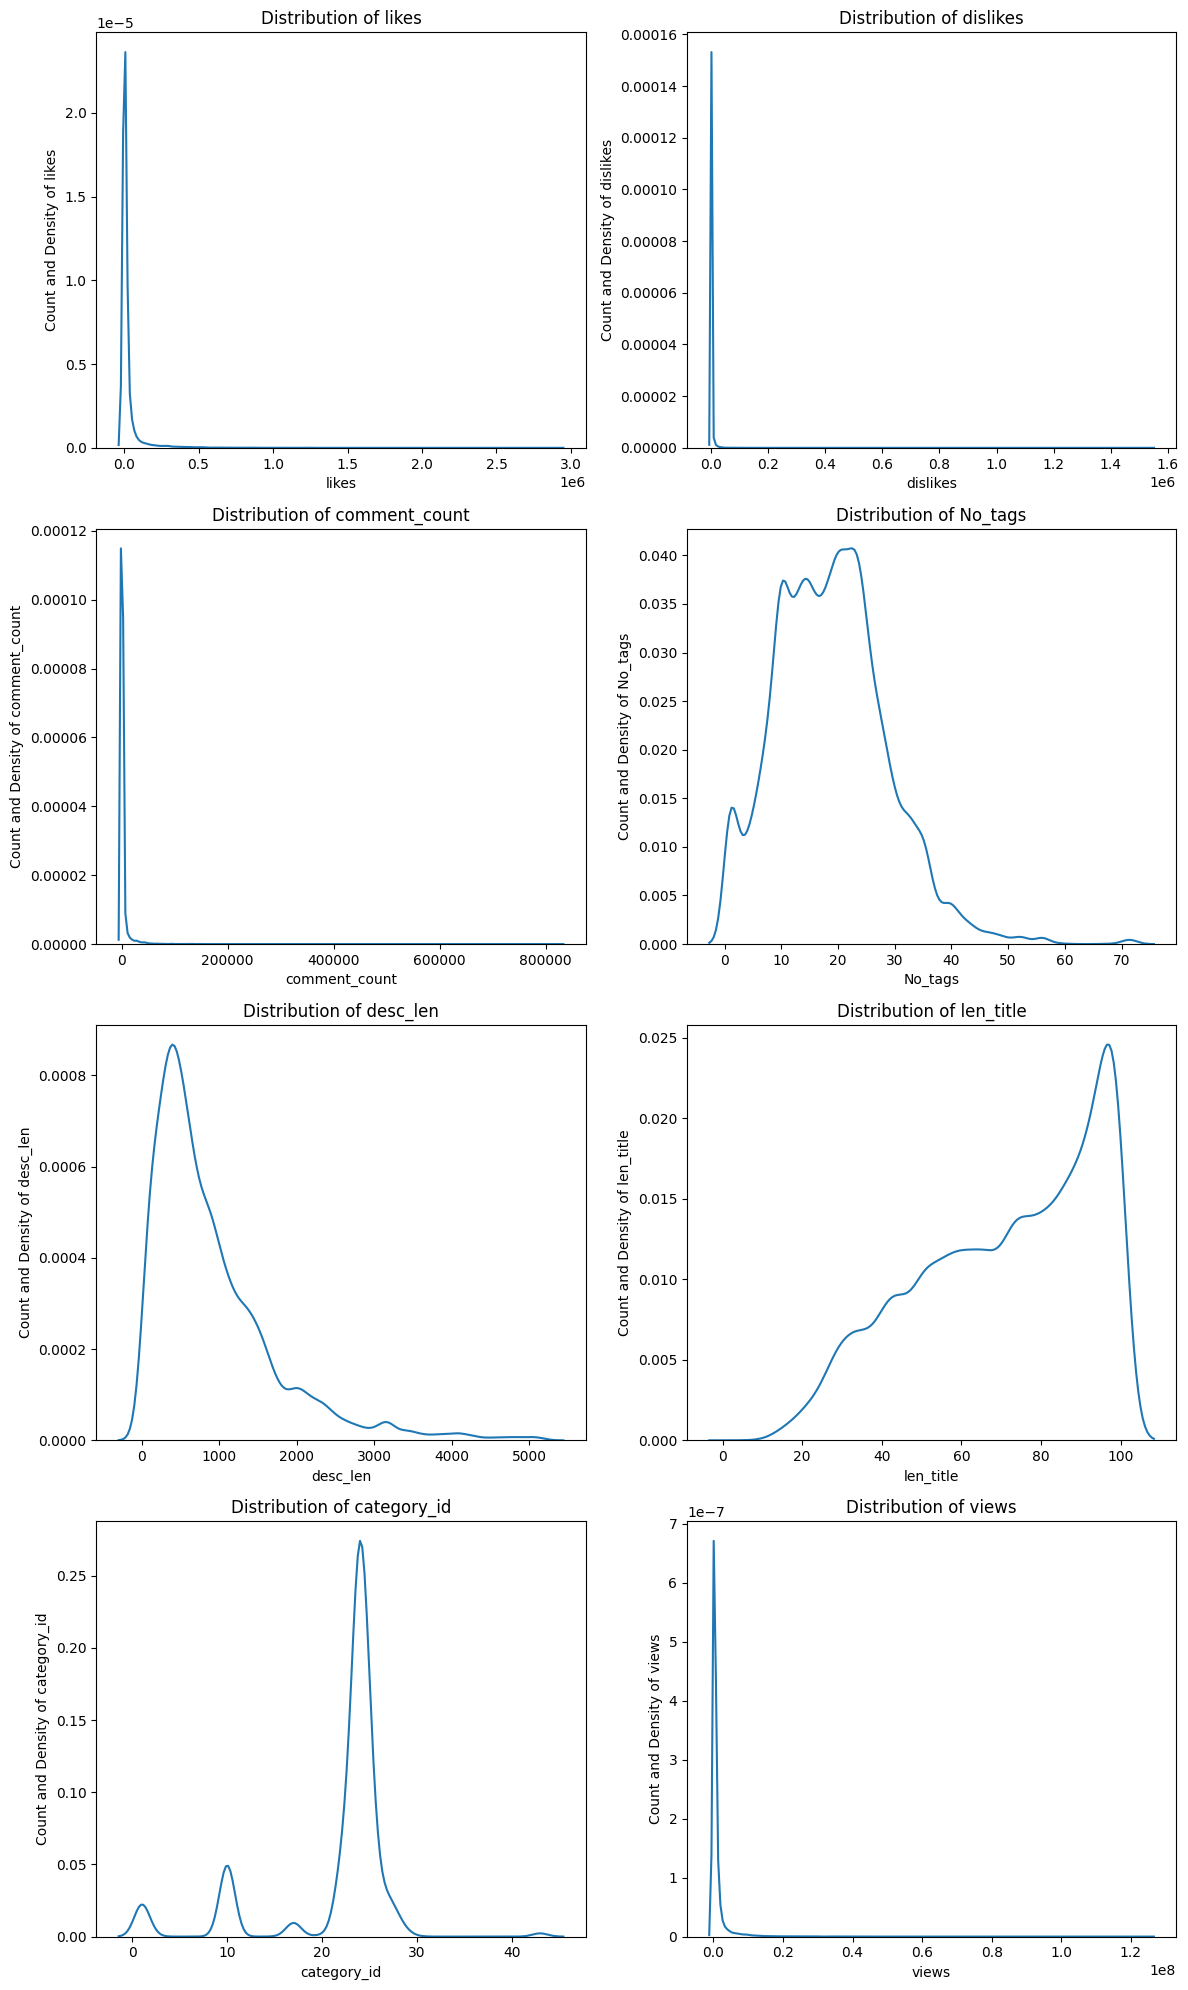

In [87]:
# Kdeplot

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,20))
axes = axes.flatten()

for i in range(len(nums)) :
    sns.kdeplot(ax=axes[i], x=df[nums[i]])
    axes[i].set_title(f'Distribution of {nums[i]}')
    axes[i].set_ylabel(f'Count and Density of {nums[i]}')
    axes[i].set_xlabel(f'{nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes) :
    axes[len(nums)].remove()

plt.tight_layout()

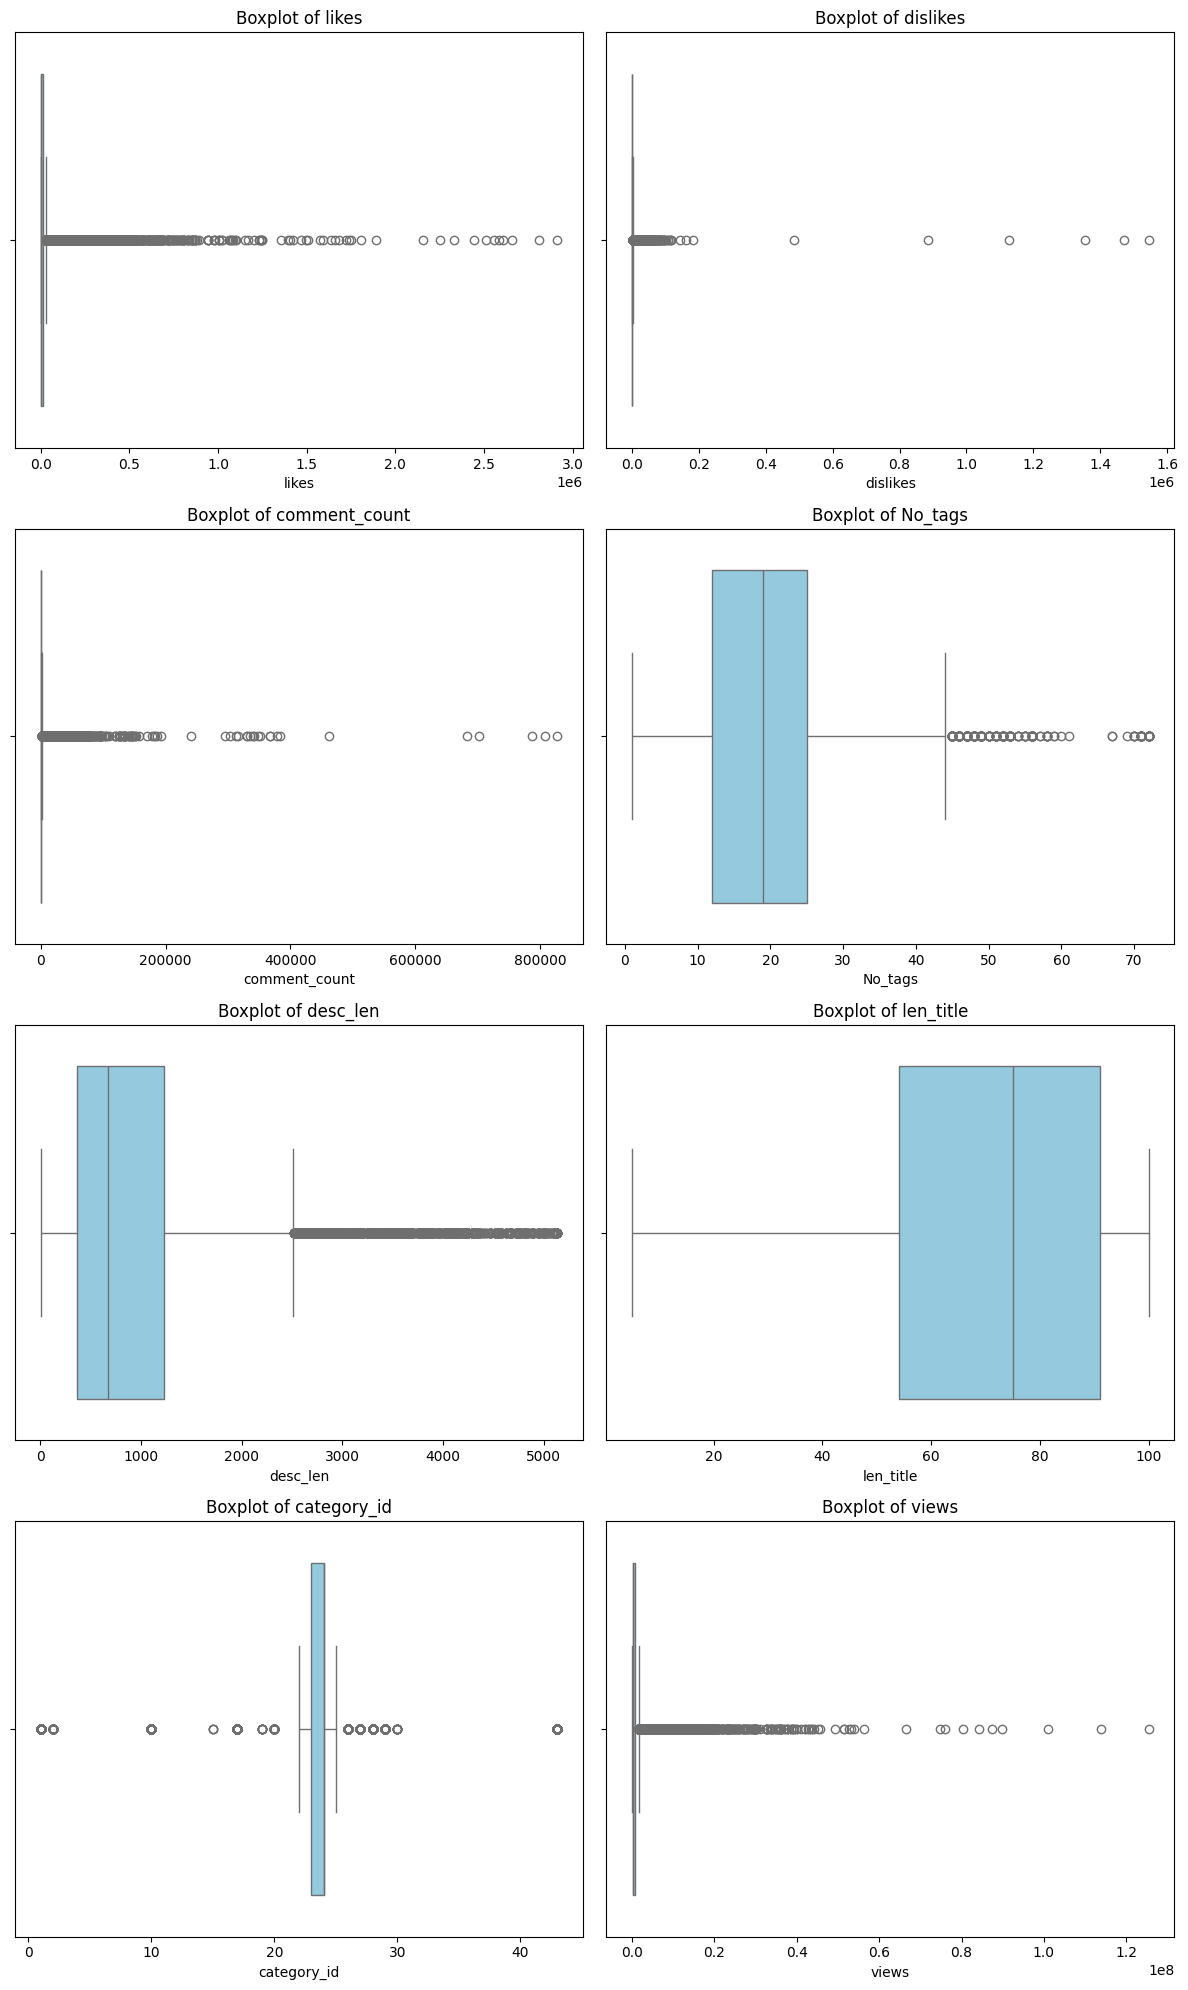

In [88]:
# Boxplot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.boxplot(ax=axes[i], x=df[nums[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes) :
    axes[len(nums)].remove()

plt.tight_layout()

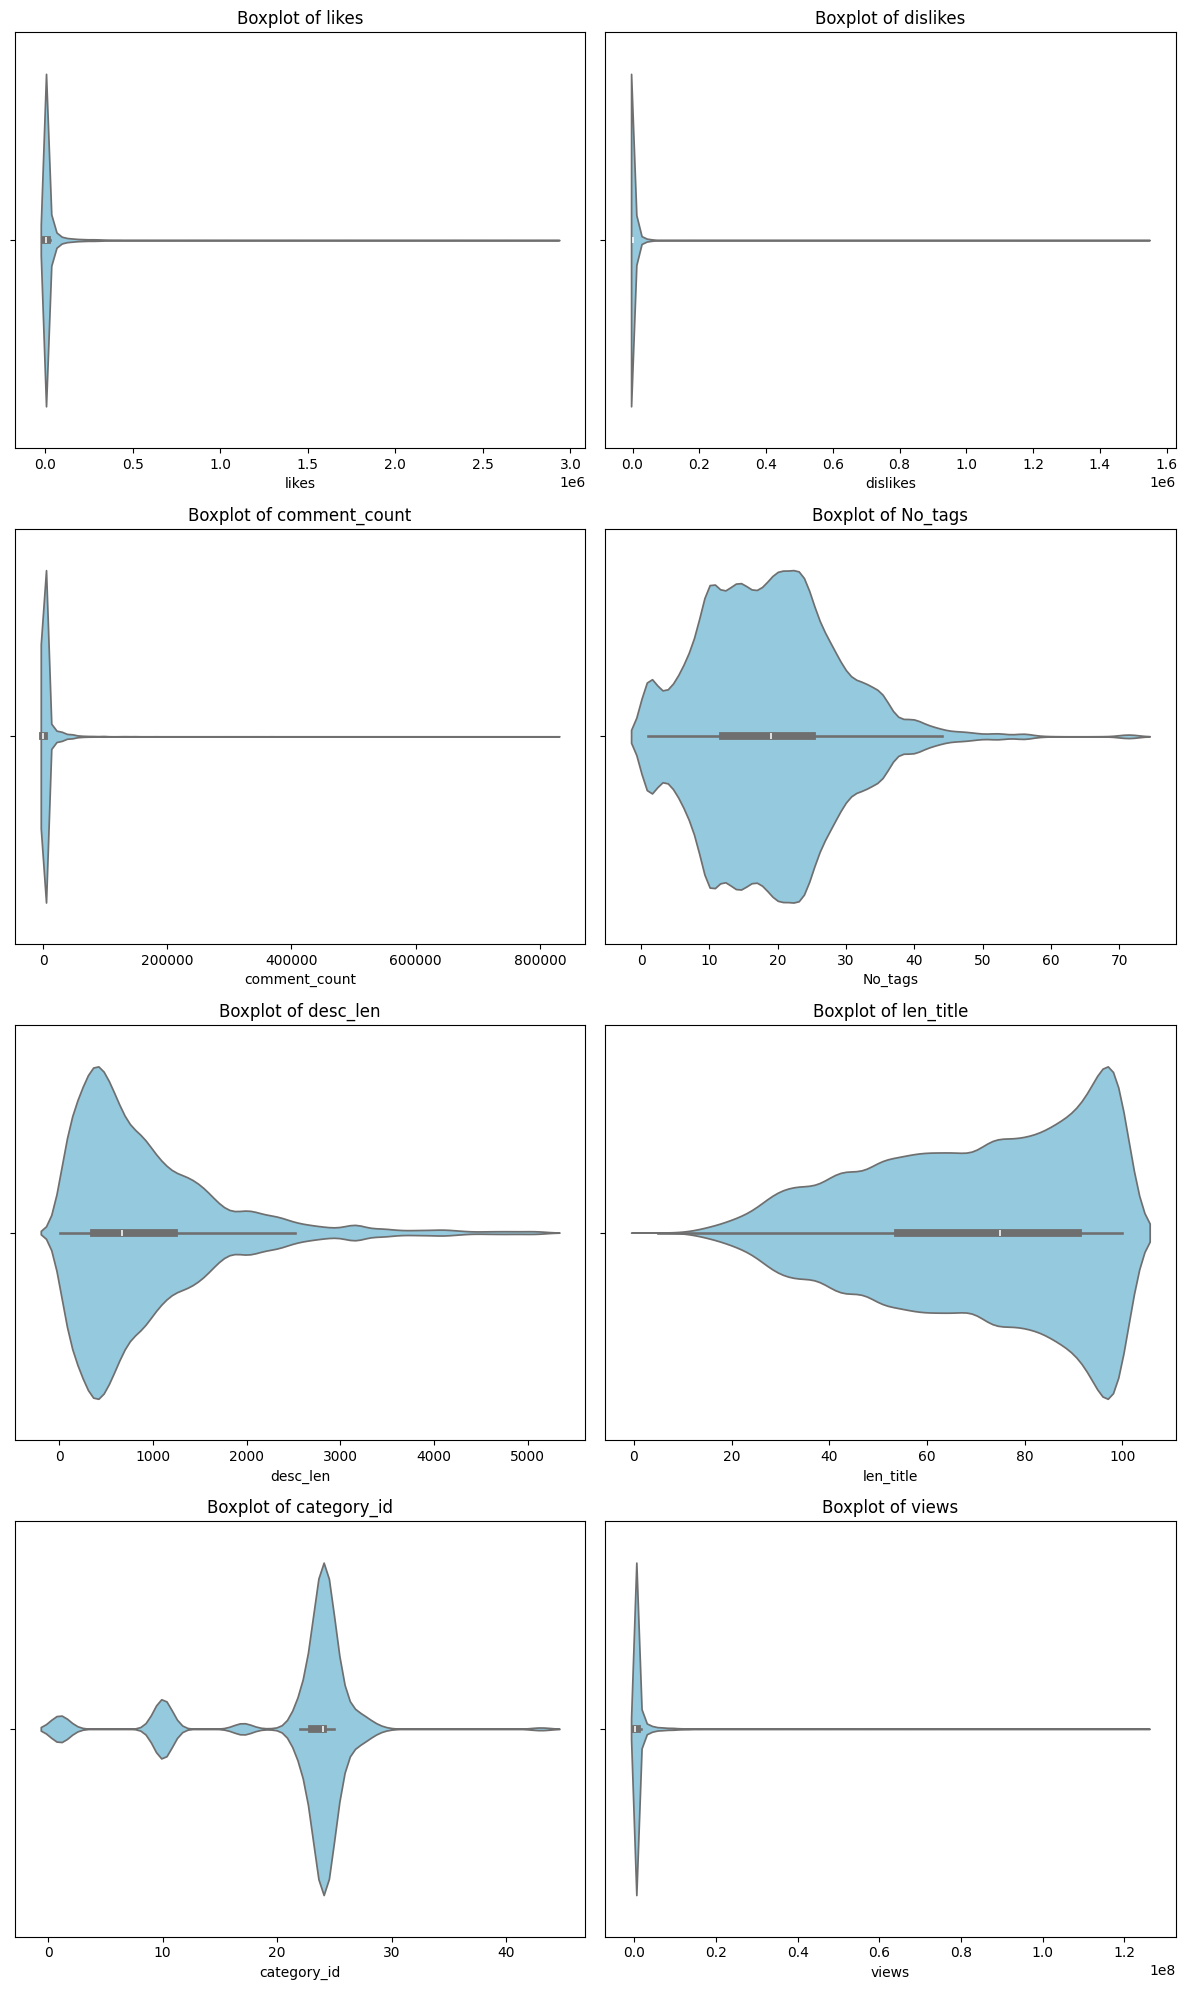

In [89]:
# Violinplot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.violinplot(ax=axes[i], x=df[nums[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes) :
    axes[len(nums)].remove()

plt.tight_layout()

## Categorical and Boolean Columns

In [90]:
df[cats]

title       channel_title  \
0      Sharry Mann: Cute Munda ( Song Teaser) | Parmi...     Lokdhun Punjabi   
1      पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...             HJ NEWS   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...                TFPC   
3                         Eruma Saani | Tamil vs English         Eruma Saani   
4      why Samantha became EMOTIONAL @ Samantha naga ...          Filmylooks   
...                                                  ...                 ...   
36739  Engineering Girls | Web Series | S01E02 - Ghar...      The Timeliners   
36740  Rusev vs. Samoa Joe - with Special Guest Refer...                 WWE   
36741  Dhadak | Official Trailer | Janhvi & Ishaan | ...  Dharma Productions   
36758                   What If PubG Was Made In India ?         Angry Prash   
36769  Funny Ramzan Scenes Part - 2 | Hyderabadi Come...    Warangal Diaries   

                                                    tags  \
0      sharry mann|"sharry mann new song"|"sharry man...   
1      पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...   
3      Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...   
4      Filmylooks|"latest news"|"telugu movies"|"telu...   
...                                                  ...   
36739  funny videos|"hotels"|"comedy"|"comedy video"|...   
36740  wwe|"world wrestling entertainment"|"wrestling...   
36741  Dharma|"Dharma Productions"|"Dhadak"|"Janhvi K...   
36758  pubg|"PlayerUnknown's Battlegrounds"|"pubg mob...   
36769  warangal diaries|"latest"|"funny"|"comedy"|"Ba...   

                                             description  
0      Presenting Sharry Mann latest Punjabi Song  Cu...  
1      पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...  
2      Watch Stylish Star Allu Arjun @ ChaySam Weddin...  
3      This video showcases the difference between pe...  
4      why Samantha became EMOTIONAL @ Samantha naga ...  
...                                                  ...  
36739  Maggu is preparing for Sharda University inter...  
36740  The Miz serves as special guest referee in thi...  
36741  When two worlds collide, they become oneDhadak...  
36758  This funny video is about what if players unkn...  
36769  (Earphone Use Is Recommended)!!Funny Ramzan Sc...  

[32562 rows x 4 columns]

In [91]:
#Categorical Feature Counts
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom title:
title
Nandhini | Today @ 9 pm | Sun TV                                                                        15
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures                            14
Sanju | Official Teaser | Ranbir Kapoor | Rajkumar Hirani                                               13
Kasthooriman || General Promo || Mon to Sat at 8:30 PM || Asianet                                       12
School Ke Wo Din - Amit Bhadana                                                                         11
                                                                                                        ..
ജീവനെടുത്ത ഓട്ടോ ഡ്രൈവറുടെ ആത്മഹത്യ കുറിപ്പ് പുറത്ത്|new|asianet|news|malayalam|today|latest|exclusi     1
Budget 2018: देखिए क्या हुआ सस्ता और क्या महंगा | Headlines India                                        1
Fire in Madurai Meenakshi Amman Temple Complex, Many Shops Gutted | Thanthi TV                           1
Hey Ju

Those features have too many unique values for direct plotting or one-hot encoding. Specific grouping through feature engineering and extraction is needed beforehand if you intend to use them

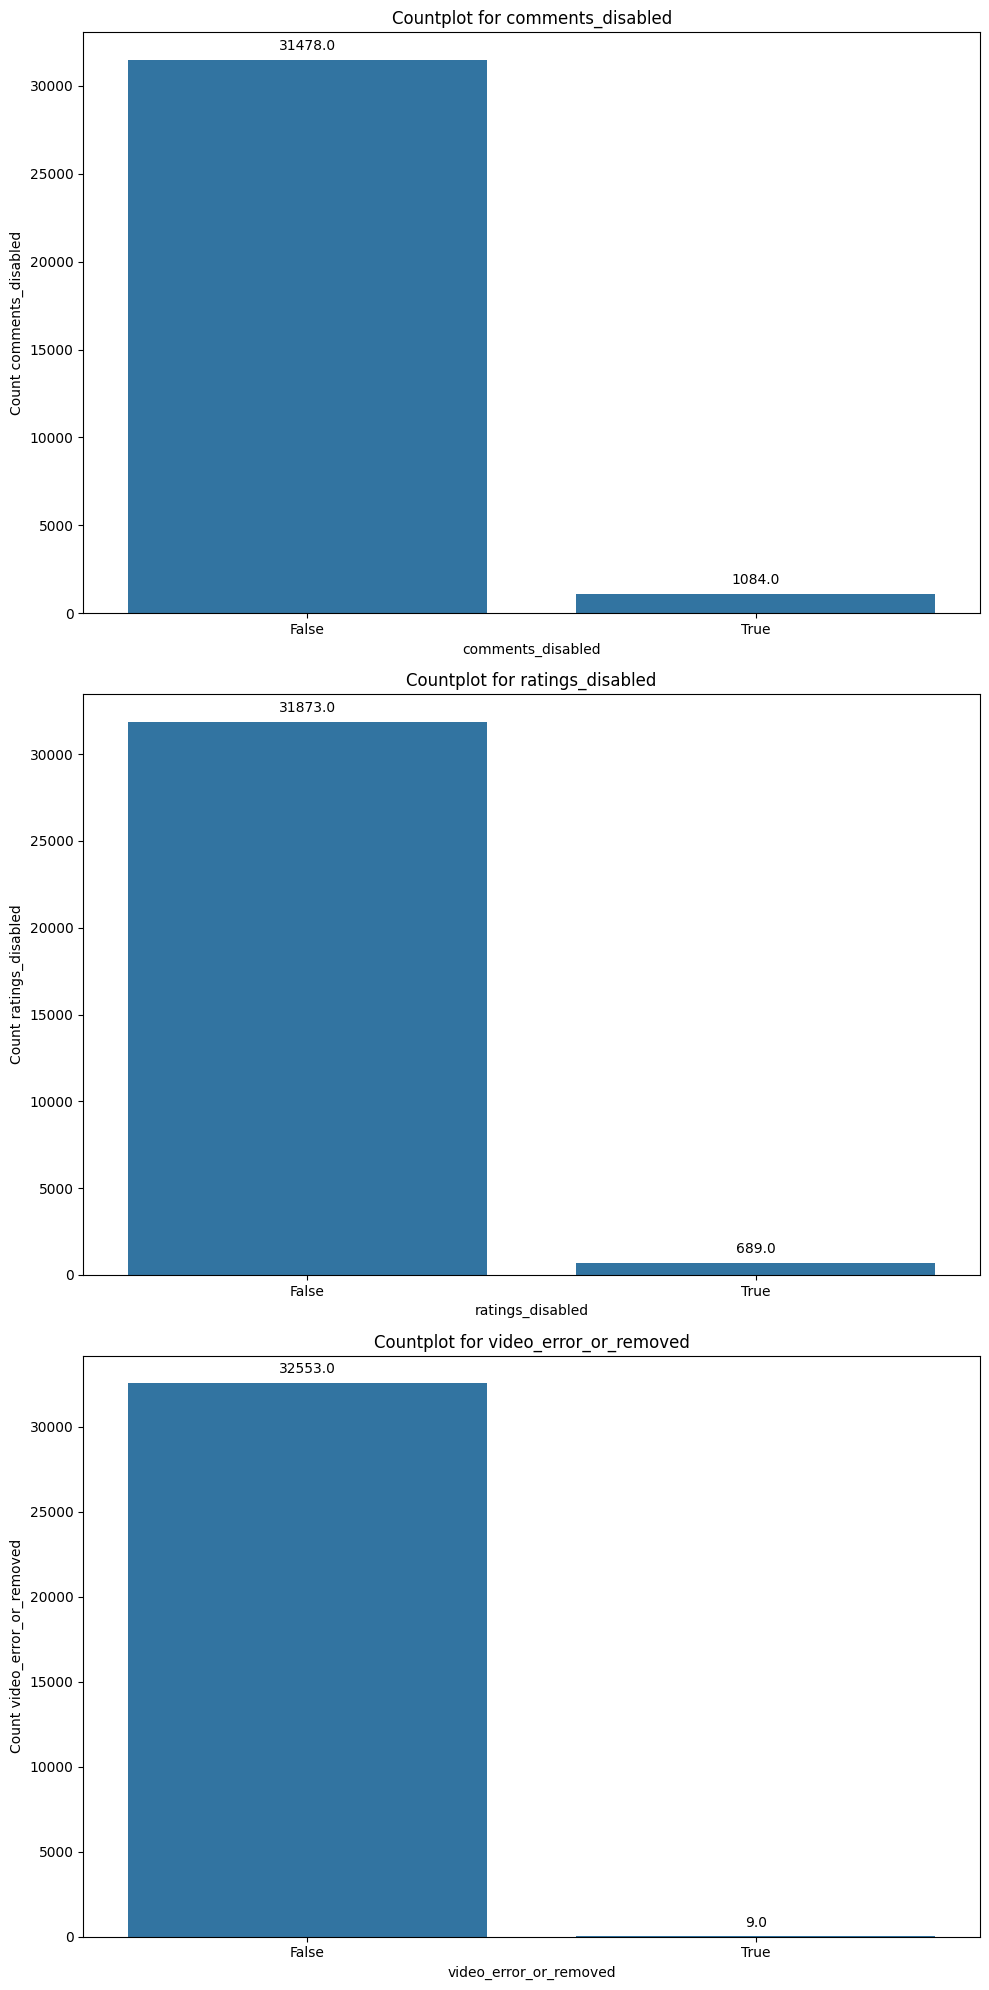

In [92]:
#Boolean features understanding
bool = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

for i in range(len(bool)):
    ax = sns.countplot(ax=axes[i], x=df[bool[i]])
    axes[i].set_title(f'Countplot for {bool[i]}')
    axes[i].set_ylabel(f'Count {bool[i]}')
    axes[i].tick_params(axis='x')

    # Adding annotations on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

There is a significant imbalance in these boolean values, so it will be addressed further, possibly through feature scaling, later on.

# Bivariate & Multivariate Analysis

Text(0.5, 1.0, 'Countplot Category id')

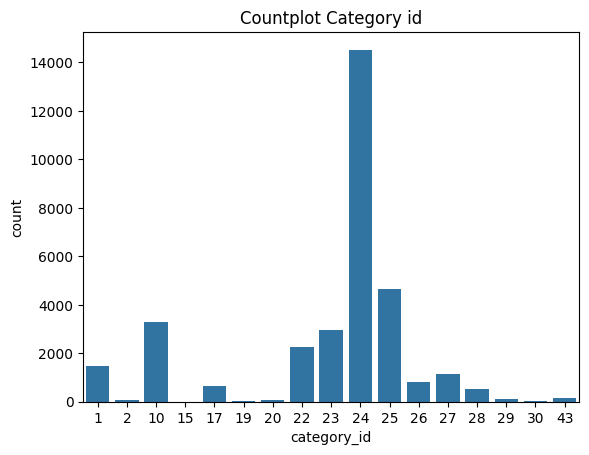

In [93]:
sns.countplot(data=df, x='category_id')
plt.title('Countplot Category id')

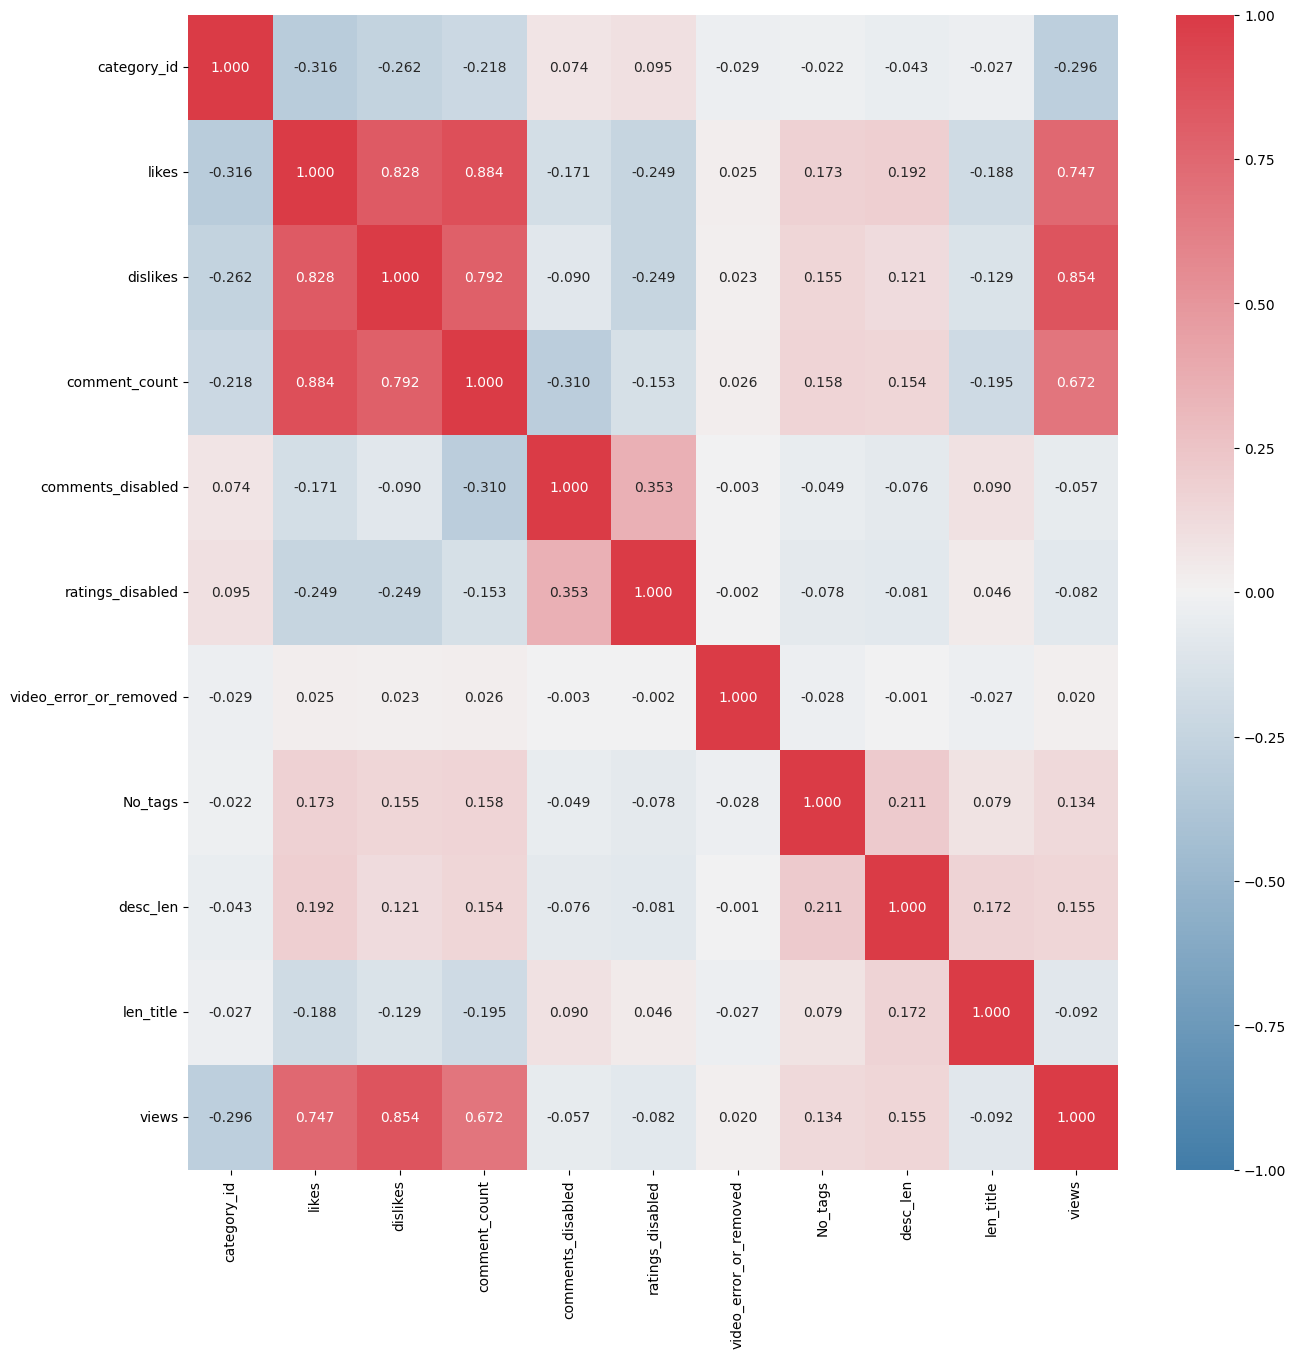

In [94]:
# Heatmap (corr spearman)
plt.figure(figsize=(15,15))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data = df.corr(numeric_only=True, method='spearman'), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

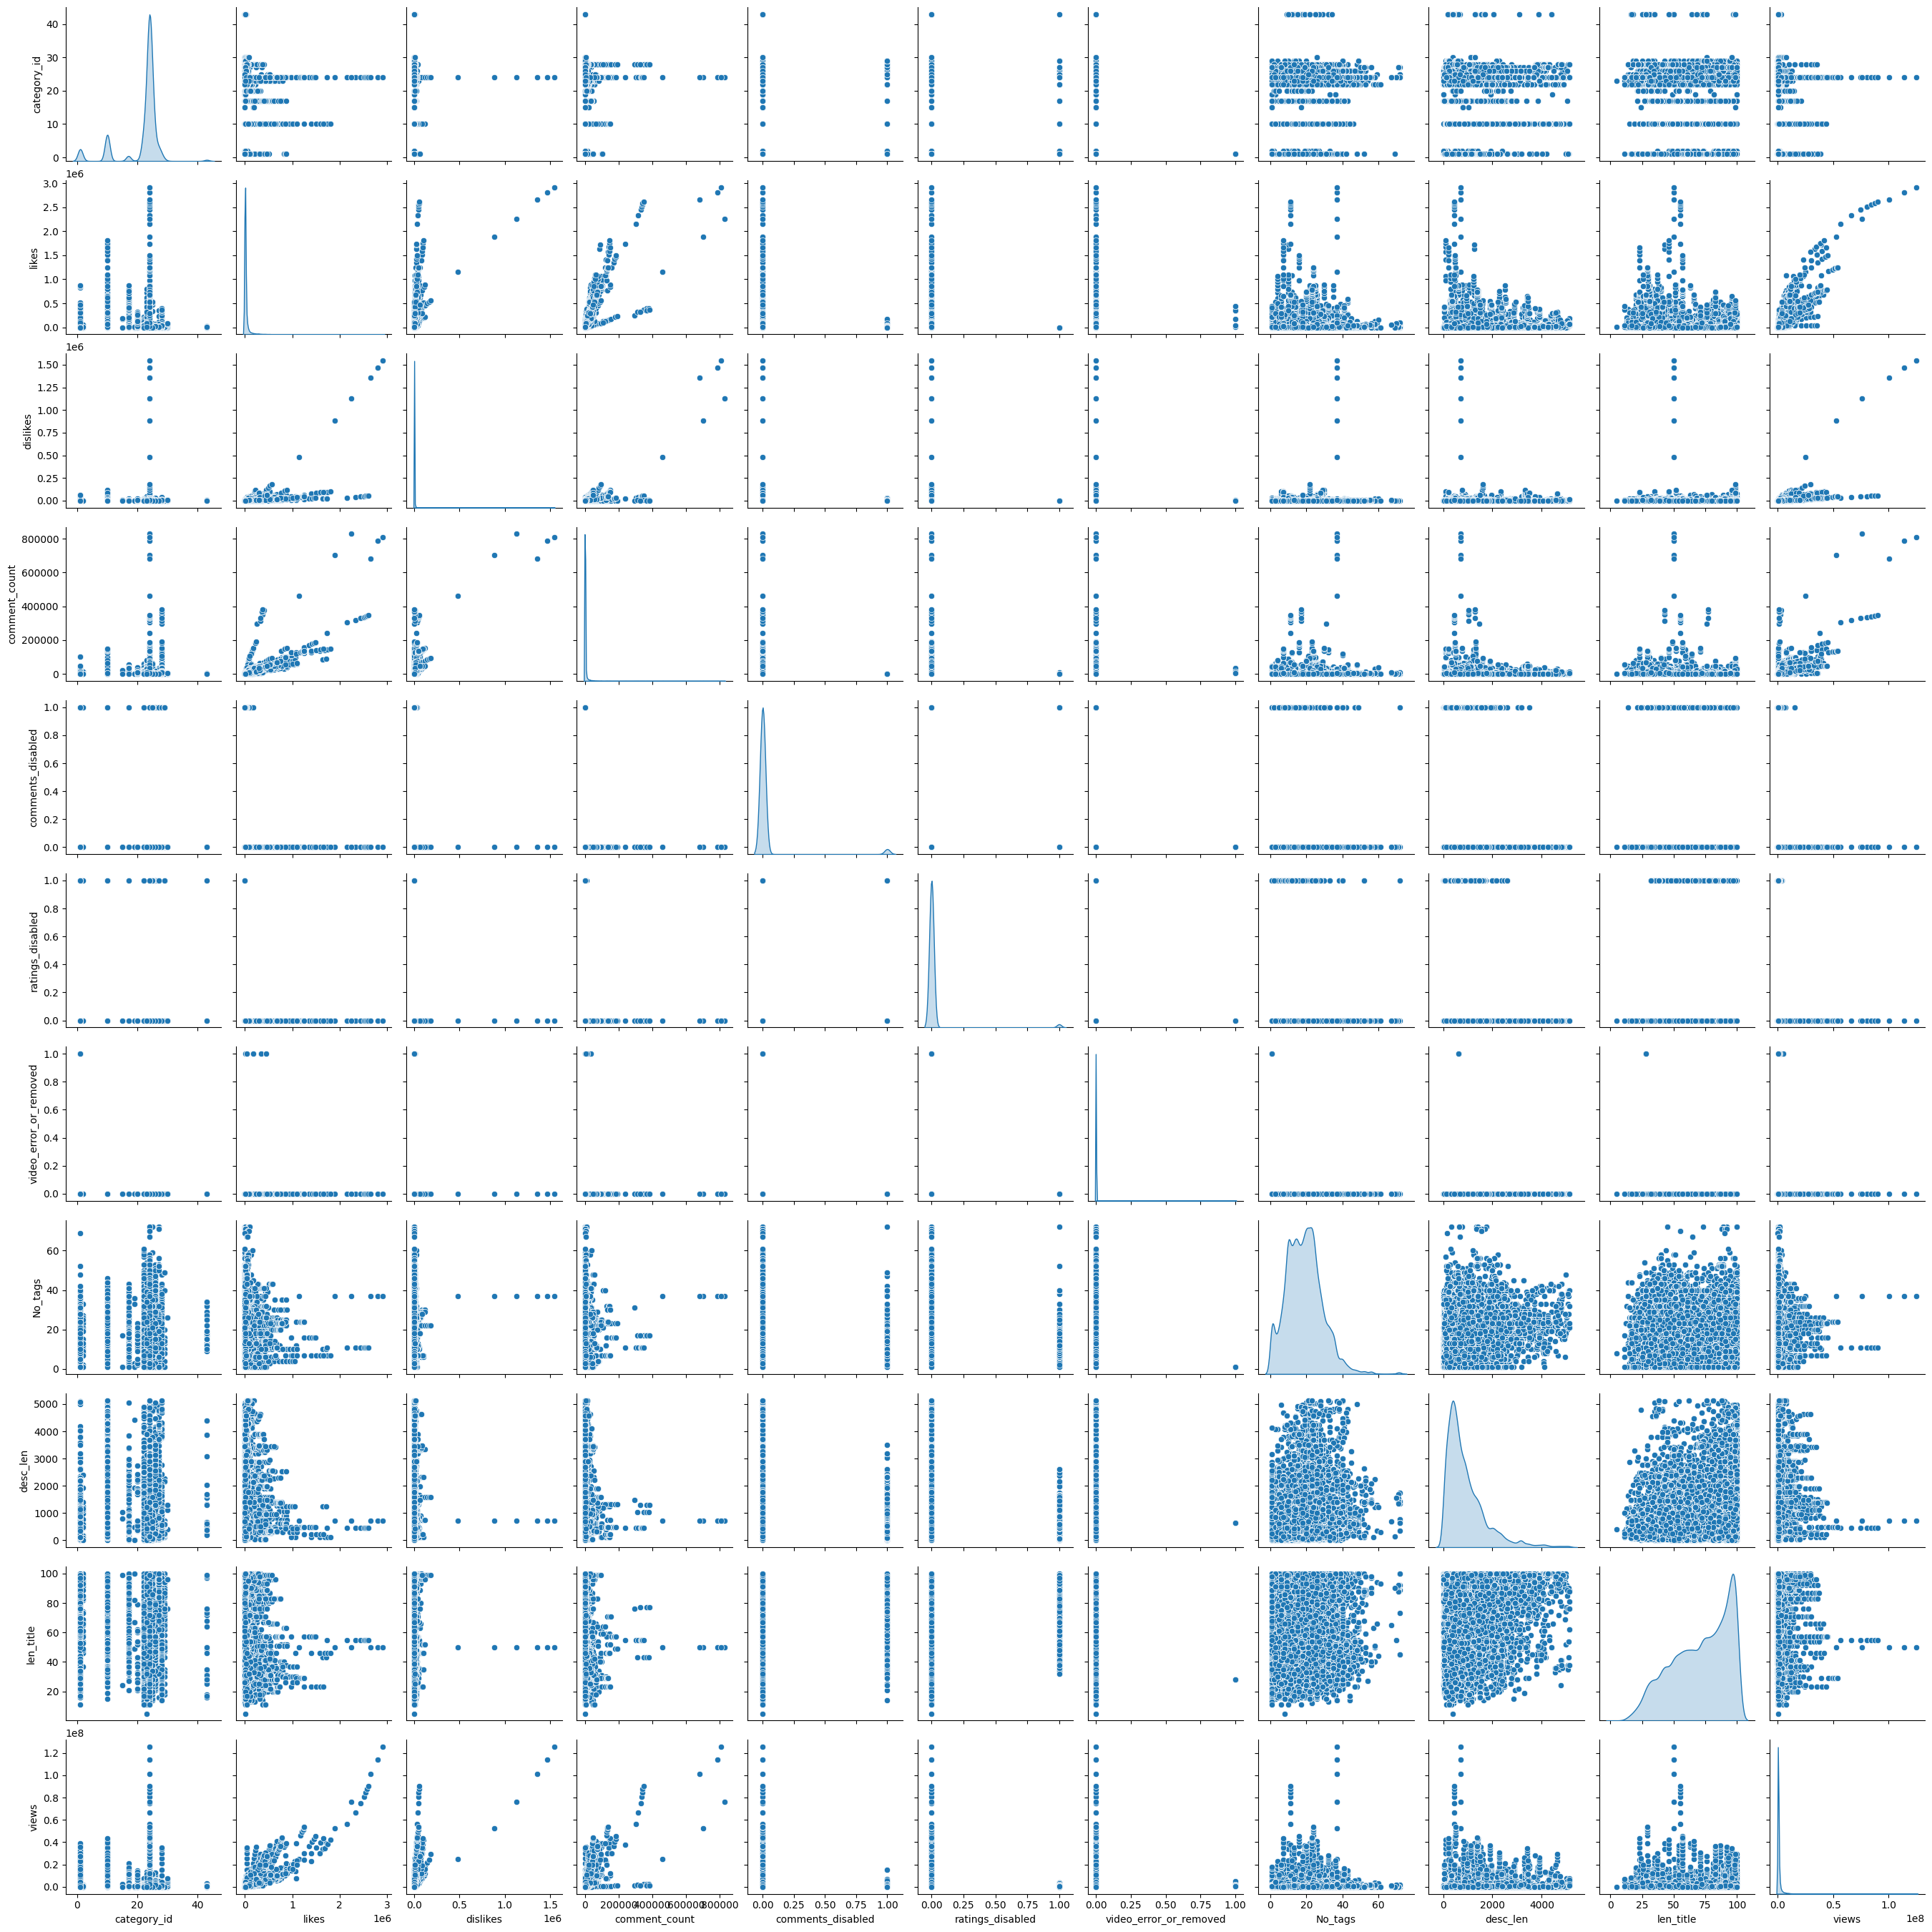

In [95]:
# Pairplot
sns.pairplot(df, diag_kind='kde')
plt.show()

# Pre-Processing & Feature Engineering

In [96]:
# Make a copy of original dataframe for preprocessing and encoding process

df_encoding = df.copy()

df_encoding.sample(5)

trending_date                                              title  \
2883     2017-11-29  ಸದಾಕಾಲ ದೀಪ ಹಚ್ಚುವುದರಿಂದ ಏನಾಗುತ್ತೆ ಗೊತ್ತಾ | Kan...   
30935    2018-05-13  Chacha Vidhayak Hain Humare-Title Song- Zakir ...   
31707    2018-05-17  Yarusalem Naayaka Video Song | Abrahaminte San...   
35340    2018-06-06  Bumblebee (2018) - Official Teaser Trailer - P...   
33979    2018-05-30  Lagira Zhala Jee - Episode 345  - May 29, 2018...   

                 channel_title  category_id publish_time  \
2883            Top Kannada TV           24     13:08:26   
30935               Zakir Khan           22     12:12:35   
31707  GOODWILL ENTERTAINMENTS           10     13:30:04   
35340       Paramount Pictures            1     07:00:01   
33979                 Ditto TV           24     01:55:13   

                                                    tags   likes  dislikes  \
2883   Top kannada TV|"sandalwood news"|"kannada film...     594       124   
30935                                             [none]   59416      2501   
31707  Yerusalem Naayaka|"Yerusalem Naayaka Video"|"Y...   31177       720   
35340                                             [none]  151352     10274   
33979  Lagira Zhala Jee|"Marathi Serial"|"Ajinkya Shi...     743        60   

       comment_count  comments_disabled  ratings_disabled  \
2883              31              False             False   
30935           3015              False             False   
31707           2989              False             False   
35340          33131              False             False   
33979             39              False             False   

       video_error_or_removed  \
2883                    False   
30935                   False   
31707                   False   
35340                   False   
33979                   False   

                                             description  No_tags  desc_len  \
2883   Watch ಸದಾಕಾಲ ದೀಪ ಹಚ್ಚುವುದರಿಂದ ಏನಾಗುತ್ತೆ ಗೊತ್ತಾ...       12        87   
30935  Suno, Sab sort karva denge. Chacha vidhayak ha...        1      1081   
31707  Presenting Abrahaminte Santhathikal Full Video...       20      1860   
35340  Every adventure has a beginning. Watch the off...        1       991   
33979  Watch Lagira Zhala Jee and other Zee Marathi s...       33       525   

       len_title publish_date    views  
2883          81   2017-11-27   111436  
30935         66   2018-05-11  1303492  
31707         98   2018-05-14   573271  
35340         63   2018-06-05  9988608  
33979         56   2018-05-29   241153

### Feature Engineering for Date and Time

In [97]:
df_encoding[date].columns

Index(['trending_date', 'publish_date', 'publish_time'], dtype='object')

In [98]:
#Check data types for dates
df[date].info()

<class 'pandas.core.frame.DataFrame'>
Index: 32562 entries, 0 to 36769
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   trending_date  32562 non-null  object        
 1   publish_date   32562 non-null  datetime64[ns]
 2   publish_time   32562 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1017.6+ KB


We will need to change the data type for trending_date to datetime

In [99]:
df_encoding[['publish_time', 'publish_date', 'trending_date']].head()

publish_time publish_date trending_date
0     12:20:39   2017-11-12    2017-11-14
1     05:43:56   2017-11-13    2017-11-14
2     15:48:08   2017-11-12    2017-11-14
3     07:08:48   2017-11-12    2017-11-14
4     01:14:16   2017-11-13    2017-11-14

We could find how many days does it took for each video to become trending, and also find out at what publish time (hour) does a video will become trending 

In [100]:
# Split hour, minute, and second into separated columns
df_encoding[['publish_hour', 'publish_minute', 'publish_second']] = df_encoding['publish_time'].str.split(':', expand=True)

# Change data types into integer
df_encoding['publish_hour'] = df_encoding['publish_hour'].astype(int) #the most important one in publish time in a day is the hour not minutes or seconds
df_encoding.drop(columns=['publish_minute', 'publish_second'], inplace=True)
# df['minute_publish'] = df['minute_publish'].astype(int)
# df['second_publish'] = df['second_publish'].astype(int)

# Make time classifier into AM and PM
df_encoding['publish_hour_category'] = np.where((df_encoding['publish_hour'] >= 0) & (df_encoding['publish_hour'] <= 12), 'AM', 'PM')

# Quick label encoding for publish_hour_category
df_encoding['publish_hour_category'] = df_encoding['publish_hour_category'].astype('category').cat.codes

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_encoding['publish_hour_category'] = le.fit_transform(df_encoding['publish_hour_category'])

In [101]:
#Check transformation of publish_hour_category (AM : 0, PM : 1)
df_encoding[['publish_hour', 'publish_hour_category']].sample(10)

publish_hour  publish_hour_category
24549             5                      0
11884             5                      0
22300             5                      0
11255            14                      1
1728             15                      1
1563              4                      0
6003             10                      0
11105            14                      1
7137              6                      0
35236            14                      1

In [102]:
# Convert trending_date form object to datetime
df_encoding['trending_date'] = pd.to_datetime(df_encoding['trending_date'])

# Splitting trending date into year, month, and day
df_encoding['trending_year'] = df_encoding['trending_date'].dt.year
df_encoding['trending_month'] = df_encoding['trending_date'].dt.month
df_encoding['trending_day'] = df_encoding['trending_date'].dt.day
df_encoding['trending_day_of_week'] = df_encoding['trending_date'].dt.day_of_week
df_encoding['trending_day_of_year'] = df_encoding['trending_date'].dt.day_of_year
df_encoding['is_weekend_trending_day_of_week'] = df_encoding['trending_date'].dt.day_of_week.isin([5, 6])

#Check engineered features for trending_date
df_encoding[['trending_date', 'trending_year', 'trending_month', 'trending_day', 'trending_day_of_week', 'trending_day_of_year', 'is_weekend_trending_day_of_week']].head()

trending_date  trending_year  trending_month  trending_day  \
0    2017-11-14           2017              11            14   
1    2017-11-14           2017              11            14   
2    2017-11-14           2017              11            14   
3    2017-11-14           2017              11            14   
4    2017-11-14           2017              11            14   

   trending_day_of_week  trending_day_of_year  is_weekend_trending_day_of_week  
0                     1                   318                            False  
1                     1                   318                            False  
2                     1                   318                            False  
3                     1                   318                            False  
4                     1                   318                            False

In [103]:
# Convert publish_date form object to datetime
df_encoding['publish_date'] = pd.to_datetime(df_encoding['publish_date'])

# Splitting publish_date into year, month, and day
df_encoding['publish_year'] = df_encoding['publish_date'].dt.year
df_encoding['publish_month'] = df_encoding['publish_date'].dt.month
df_encoding['publish_day'] = df_encoding['publish_date'].dt.day
df_encoding['publish_day_of_week'] = df_encoding['publish_date'].dt.day_of_week
df_encoding['publish_day_of_year'] = df_encoding['publish_date'].dt.day_of_year
df_encoding['is_weekend_publish_day_of_week'] = df_encoding['publish_date'].dt.day_of_week.isin([5,6])

#Check engineered features for publish_date
df_encoding[['publish_date', 'publish_year', 'publish_month', 'publish_day', 'publish_day_of_week', 'publish_day_of_year', 'is_weekend_publish_day_of_week']].head()

publish_date  publish_year  publish_month  publish_day  publish_day_of_week  \
0   2017-11-12          2017             11           12                    6   
1   2017-11-13          2017             11           13                    0   
2   2017-11-12          2017             11           12                    6   
3   2017-11-12          2017             11           12                    6   
4   2017-11-13          2017             11           13                    0   

   publish_day_of_year  is_weekend_publish_day_of_week  
0                  316                            True  
1                  317                           False  
2                  316                            True  
3                  316                            True  
4                  317                           False

In [104]:
# Label encoding for is_weekend for trending and publish

# Label encoding for is_weekend features
df_encoding.replace({'is_weekend_trending_day_of_week':{'False':0,'True':1},
                     'is_weekend_publish_day_of_week':{'False':0,'True':1}}, inplace=True)

df_encoding['is_weekend_trending_day_of_week'] = df_encoding['is_weekend_trending_day_of_week'].astype('int64')
df_encoding['is_weekend_publish_day_of_week'] = df_encoding['is_weekend_publish_day_of_week'].astype('int64')

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_encoding['is_weekend_trending_day_of_week'] = le.fit_transform(df_encoding['is_weekend_trending_day_of_week'])
# df_encoding['is_weekend_publish_day_of_week'] = le.fit_transform(df_encoding['is_weekend_publish_day_of_week'])

In [105]:
# Calculate days difference between publish date to trending date
df_encoding['diff_publish_trending'] = (df_encoding['trending_date'] - df_encoding['publish_date']) / np.timedelta64(1, 'D')

This code used to calculate the difference in days between the 'trending_date' and 'publish_date' columns in DataFrame `df_encoding` and then assigning the result to a new column named 'diff_publish_trending'.

explanation :

- `df_encoding['trending_date']`: Accessing the 'trending_date' column in the DataFrame.
- `df_encoding['publish_date']`: Accessing the 'publish_date' column in the DataFrame.
- `(df_encoding['trending_date'] - df_encoding['publish_date'])`: Calculating the time difference between 'trending_date' and 'publish_date'. This would result in a Pandas Series with time differences.
- `/ np.timedelta64(1, 'D')`: Dividing the time differences by the number of days (1 day) to convert the time difference to days.

In [106]:
# Re-arrange the columns (views in last)
df_1 = df_encoding.drop(columns='views')
df_2 = df_encoding['views']
df_encoding = pd.concat([df_1, df_2], axis='columns')

In [107]:
#Check engineered dataframe info
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32562 entries, 0 to 36769
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   trending_date                    32562 non-null  datetime64[ns]
 1   title                            32562 non-null  object        
 2   channel_title                    32562 non-null  object        
 3   category_id                      32562 non-null  int64         
 4   publish_time                     32562 non-null  object        
 5   tags                             32562 non-null  object        
 6   likes                            32562 non-null  int64         
 7   dislikes                         32562 non-null  int64         
 8   comment_count                    32562 non-null  int64         
 9   comments_disabled                32562 non-null  bool          
 10  ratings_disabled                 32562 non-null  bool          

<Axes: >

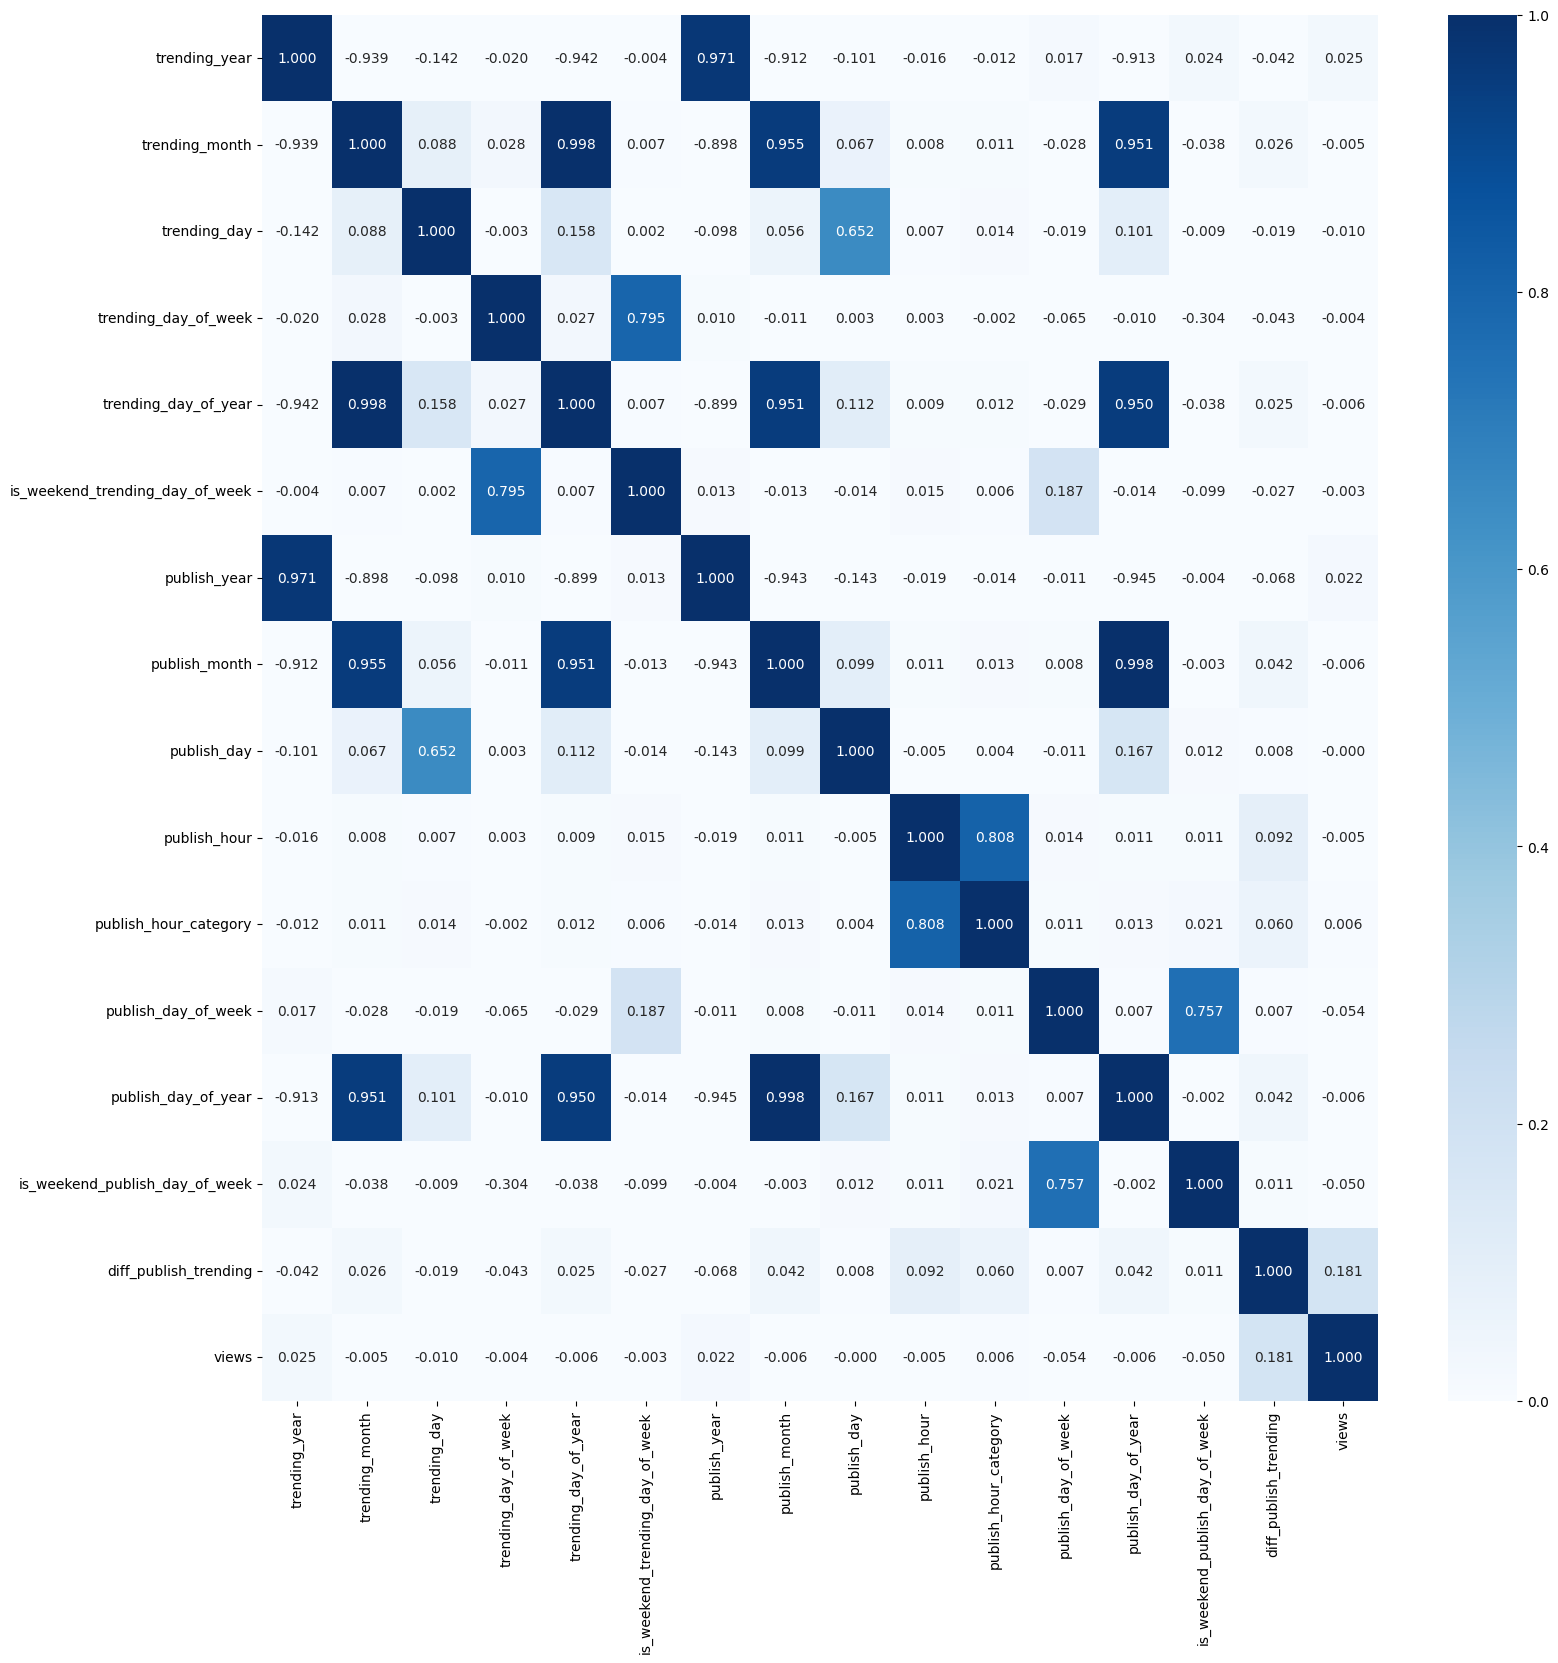

In [108]:
# Heatmap for every date features to target (views)
plt.figure(figsize=(18, 18))
sns.heatmap(df_encoding[['trending_year', 'trending_month', 'trending_day', 'trending_day_of_week', 'trending_day_of_year', 'is_weekend_trending_day_of_week', 'publish_year', 'publish_month', 'publish_day', 'publish_hour', 'publish_hour_category', 'publish_day_of_week', 'publish_day_of_year', 'is_weekend_publish_day_of_week', 'diff_publish_trending', 'views']].corr(numeric_only=True), cmap='Blues', annot=True, fmt='.3f', vmin=0, vmax=1)

From the new features, 'diff_days' will be included because it has the highest correlation with the target variable. Additionally, some potential features with correlations greater than |0.05|, such as 'publish_day_of_week' (excluding 'is_weekend_publish_day_of_week' as it is a derivative of 'publish_day_of_week' to prevent multicollinearity)

### Feature Engineering For Bool (One-Hot Encoding)

In [109]:
df_encoding[bool].columns

Index(['comments_disabled', 'ratings_disabled', 'video_error_or_removed'], dtype='object')

In [110]:
for col in bool :
    print(f'value counts for {col}')
    print(df_encoding[col].value_counts())
    print()

value counts for comments_disabled
comments_disabled
False    31478
True      1084
Name: count, dtype: int64

value counts for ratings_disabled
ratings_disabled
False    31873
True       689
Name: count, dtype: int64

value counts for video_error_or_removed
video_error_or_removed
False    32553
True         9
Name: count, dtype: int64



In [111]:
# Before Encoding
df_encoding[bool].head()

comments_disabled  ratings_disabled  video_error_or_removed
0              False             False                   False
1               True             False                   False
2              False             False                   False
3              False             False                   False
4              False             False                   False

For binary features like "comments_disabled," where the values are either 0 or 1, it is generally recommended to use label encoding. Label encoding is suitable for binary categorical variables as it represents the two categories with 0 and 1, which aligns well with the natural order of the data.

One-hot encoding, on the other hand, creates a binary column for each category and might be considered redundant for binary features. It can be more suitable for categorical features with more than two categories.

In situations where you have a binary feature with a highly imbalanced distribution, such as the one you described (98% for 0 and 2% for 1), using label encoding might not be the best choice. Label encoding introduces an ordinal relationship between the categories, which may not be appropriate for imbalanced data, especially when there's no inherent order or hierarchy in the categories.

In such cases, you might consider using other encoding techniques, and frequency encoding could be a good option. Frequency encoding replaces each category with its frequency or percentage of occurrences in the dataset. This helps the model capture the imbalance in the data without assuming an ordinal relationship.

In [112]:
# !pip install category_encoders

In [113]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

columns_to_freq_encoding = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']

df_encoding[columns_to_freq_encoding] = df_encoding[columns_to_freq_encoding].astype('str')

for column in columns_to_freq_encoding:
    df_encoding[column] = le.fit_transform(df_encoding[column])

In [114]:
# # Frequency/Count Encoding

# import category_encoders as ce

# count_encoder = ce.CountEncoder()

# columns_to_freq_encoding = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']

# df_encoding[columns_to_freq_encoding] = df_encoding[columns_to_freq_encoding].astype('str')

# for column in columns_to_freq_encoding:
#     df_encoding[column] = count_encoder.fit_transform(df_encoding[column])

In [115]:
# # One-hot Encoding

# columns_to_ohe = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']

# # Loop through the columns and perform one-hot encoding
# for column in columns_to_ohe:
#     onehots = pd.get_dummies(df_encoding[column], prefix=column)
#     onehots = onehots.astype(int)
#     df_encoding = df_encoding.join(onehots)

# # Drop the original columns after one-hot encoding
# df_encoding = df_encoding.drop(columns=columns_to_ohe)

In [116]:
# # After One-hot Encoding
# df_encoding.iloc[:, -6:]

### Final Check for Every Feature Before Selection

In [117]:
# Re-arrange the columns (views in last)
df_1 = df_encoding.drop(columns='views')
df_2 = df_encoding['views']
df_encoding = pd.concat([df_1, df_2], axis='columns')

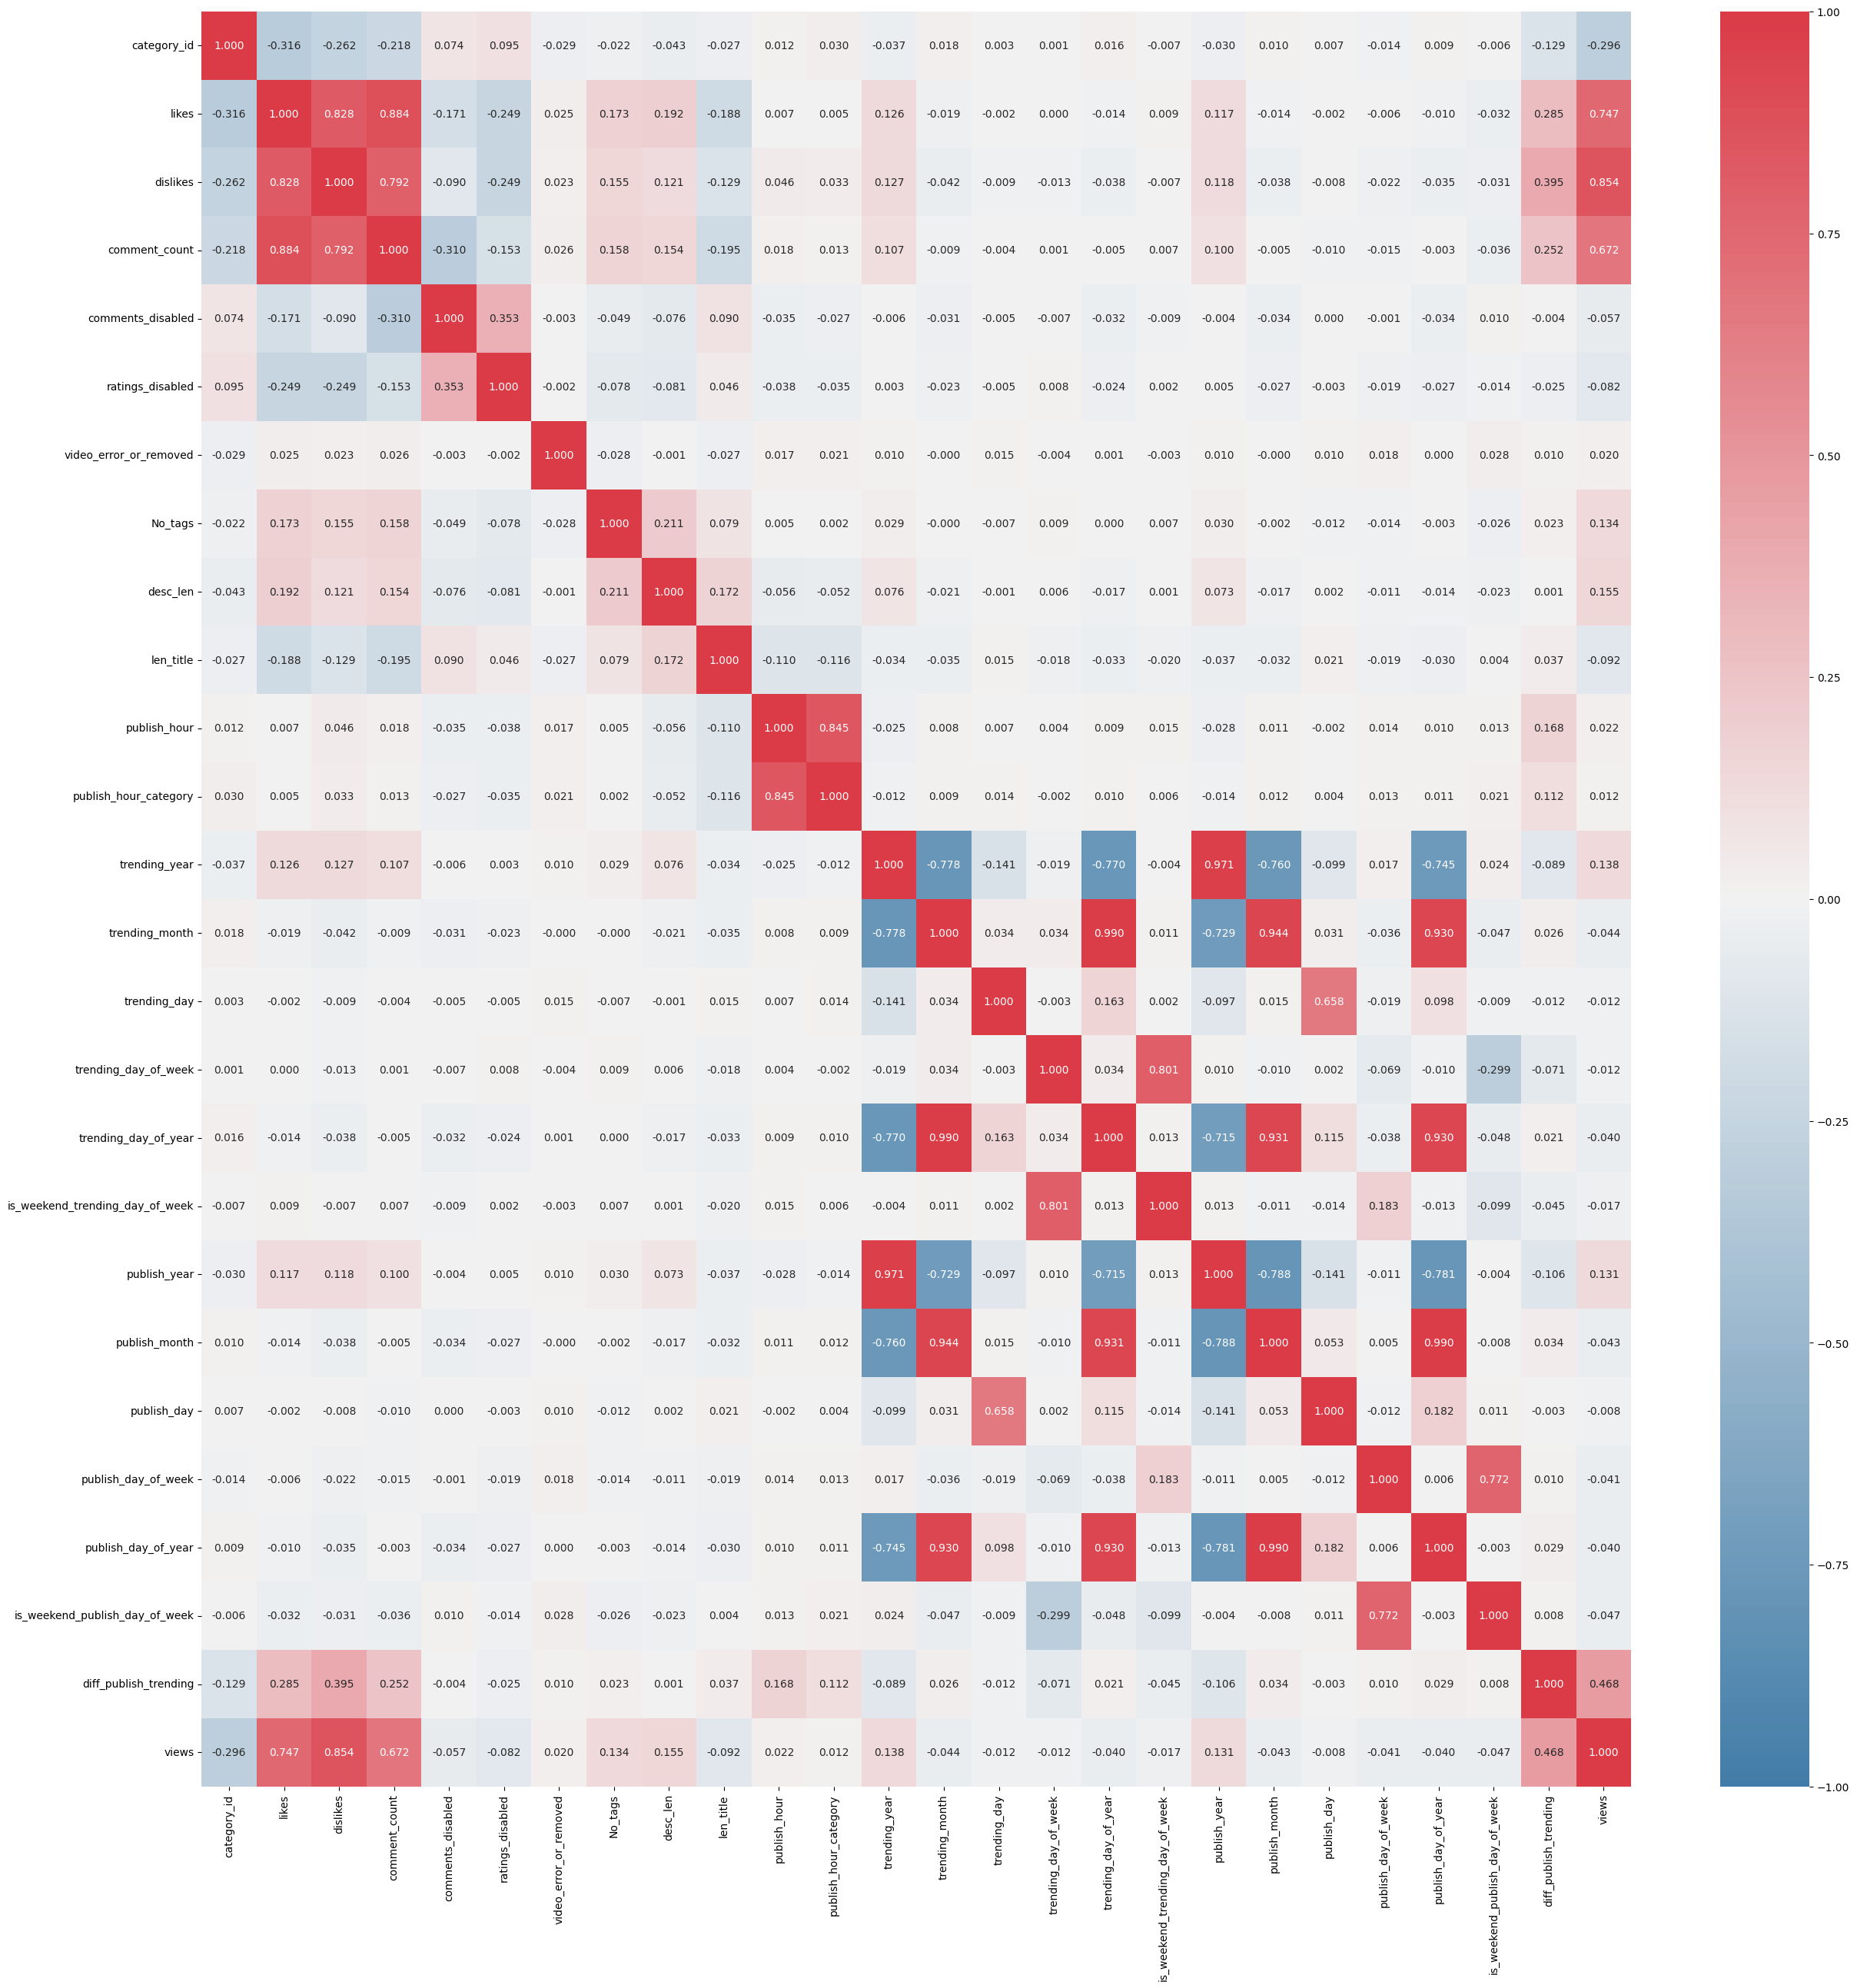

In [118]:
# Heatmap (corr spearman)
plt.figure(figsize=(30,30))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data = df_encoding.corr(numeric_only=True, method='spearman'), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

In this case, the features to be used include: 'category_id', 'likes', 'dislikes', 'No_tags', 'desc_len', 'diff_days', and features resulting from encoding process based on considerations of the problem context, feature-target correlation, feature-feature correlation. Additionally, redundant features (with high correlation) will be discarded, keeping only one with the highest to target.

# Feature Selection

In [119]:
df_encoding.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'No_tags', 'desc_len', 'len_title', 'publish_date',
       'publish_hour', 'publish_hour_category', 'trending_year',
       'trending_month', 'trending_day', 'trending_day_of_week',
       'trending_day_of_year', 'is_weekend_trending_day_of_week',
       'publish_year', 'publish_month', 'publish_day', 'publish_day_of_week',
       'publish_day_of_year', 'is_weekend_publish_day_of_week',
       'diff_publish_trending', 'views'],
      dtype='object')

In [120]:
# Select only relevant features

df_model = df_encoding.copy()

#Using label or freq encoding

selected_features = ['category_id', 'likes', 'dislikes', 'No_tags', 'desc_len', 
                     'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
                     'diff_publish_trending', 'views']

# #Using OHE
# selected_features = ['category_id', 'likes', 'dislikes', 'No_tags', 'desc_len', 'diff_publish_trending',
#                      'comments_disabled_False','comments_disabled_True', 'ratings_disabled_False',
#                      'ratings_disabled_True', 'video_error_or_removed_False', 'video_error_or_removed_True', 'views']

df_model = df_model[selected_features]
df_model.sample(5)

category_id  likes  dislikes  No_tags  desc_len  comments_disabled  \
19644           24    263        62        3       222                  0   
12636           10  70323      2474       29       917                  0   
5664            24   4551       107       10       172                  0   
25128           24   2369       120       35       411                  0   
7432            26    516        99       19       674                  0   

       ratings_disabled  video_error_or_removed  diff_publish_trending  \
19644                 0                       0                    1.0   
12636                 0                       0                    5.0   
5664                  0                       0                    1.0   
25128                 0                       0                    2.0   
7432                  0                       0                    1.0   

         views  
19644    47935  
12636  2348782  
5664     80132  
25128   145889  
7432     37621

# Train-Test Split

In [121]:
# Spliting data into train-test
x = df_model.drop(columns=['views'])
y = df_model[['views']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Handling Outliers

It is generally recommended to handle outliers based on the training data only. The reason for this is to simulate real-world conditions during the testing phase. Handling outliers in the test set could potentially distort the evaluation of the model's performance on unseen data.

Here's the typical process:

1. **Handling outliers in the training data:** Identify and handle outliers using methods like IQR (Interquartile Range) or Z-score on the training dataset. This helps the model learn from a cleaner dataset and improves its generalization.

2. **Applying the same transformation to the test data:** Use the same parameters (like median and standard deviation for Z-score) obtained from the training data to handle outliers in the test data. This ensures consistency and reflects the real-world scenario where the model encounters new, unseen data with potential outliers.

By following this approach, you are testing the model on data that resembles what it might encounter in the real world, including outliers. This provides a more accurate assessment of how well the model generalizes to new, unseen data.

In [122]:
#Make temporary dataframe of features and target for train set
df_train_handling_outliers = pd.concat([x_train, y_train], axis='columns')

In [123]:
columns_to_handle_outliers = ['category_id', 'likes', 'dislikes', 'No_tags', 'desc_len', 'diff_publish_trending']

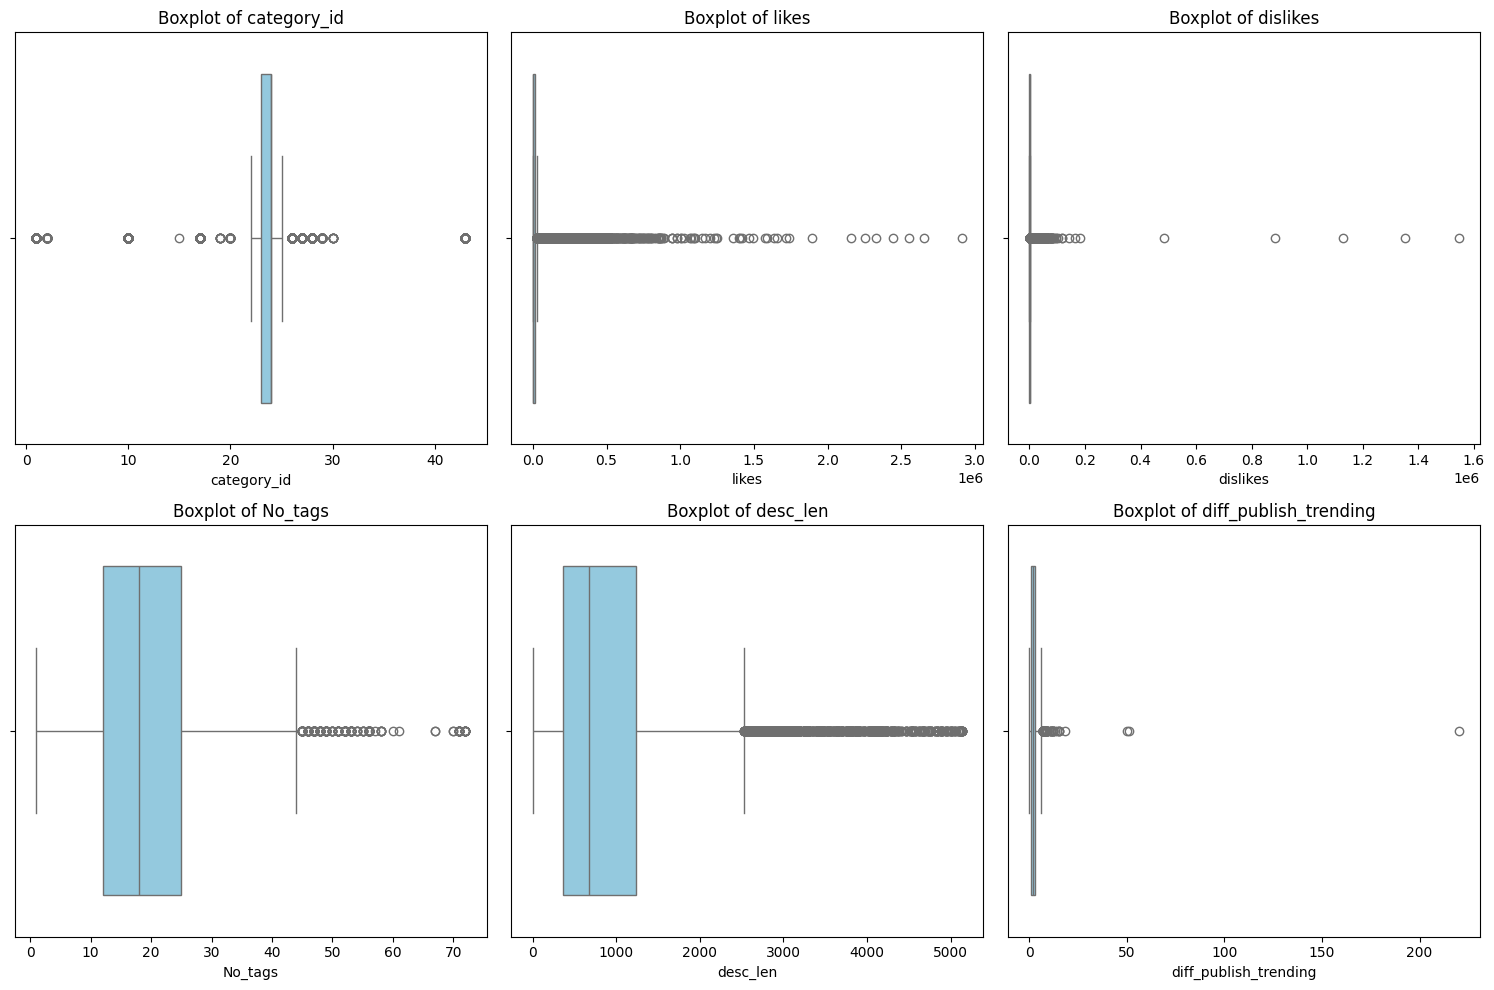

In [124]:
# Boxplot to check outliers
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i in range(len(columns_to_handle_outliers)) :
  sns.boxplot(ax=axes[i], x=df_train_handling_outliers[columns_to_handle_outliers[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {columns_to_handle_outliers[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(columns_to_handle_outliers) < len(axes) :
    axes[len(columns_to_handle_outliers)].remove()

plt.tight_layout()

In [125]:
# Remove outliers with IQR method

print(f'The number of rows before filtering out outliers : {len(df_train_handling_outliers)}')

filtered_entries = np.array([True] * len(df_train_handling_outliers))

# Select features with outliers
for col in columns_to_handle_outliers:

    Q1 = df_train_handling_outliers[col].quantile(0.25)
    Q3 = df_train_handling_outliers[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filtered_entries = ((df_train_handling_outliers[col] >= lower_bound) & (df_train_handling_outliers[col] <= upper_bound)) & filtered_entries

df_train_handling_outliers = df_train_handling_outliers[filtered_entries]

print(f'The number of rows after filtering out outliers: {len(df_train_handling_outliers)}')

The number of rows before filtering out outliers : 22793
The number of rows after filtering out outliers: 14085


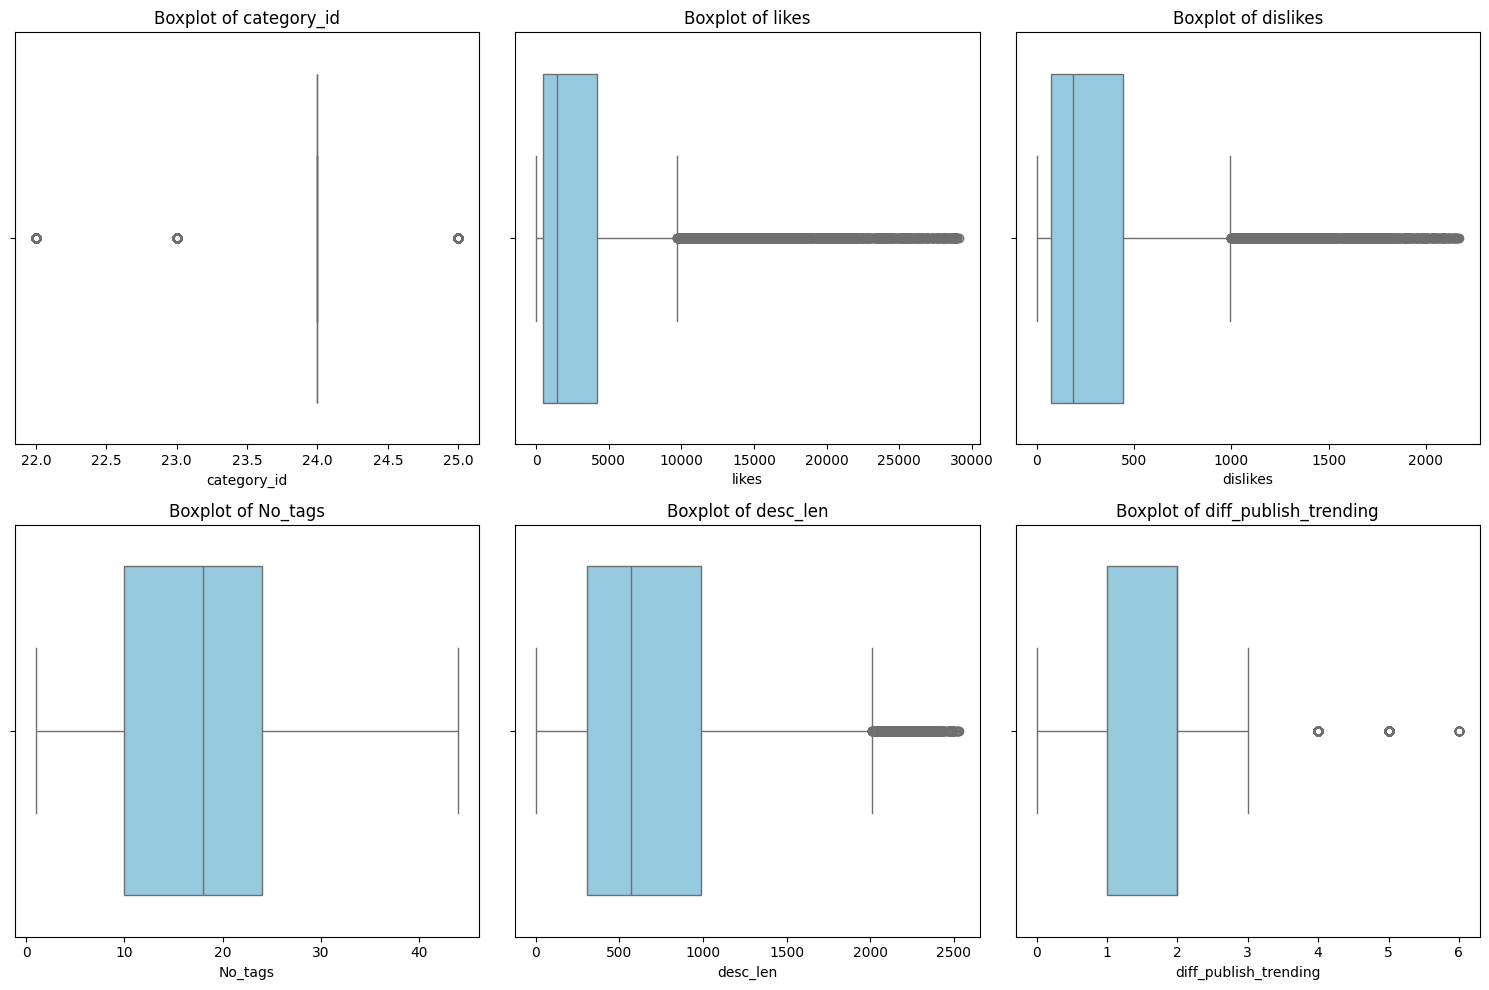

In [126]:
# Boxplot after handling outliers
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i in range(len(columns_to_handle_outliers)) :
  sns.boxplot(ax=axes[i], x=df_train_handling_outliers[columns_to_handle_outliers[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {columns_to_handle_outliers[i]}')


# Remove the last subplot if there are fewer features than subplots
if len(columns_to_handle_outliers) < len(axes):
    axes[len(columns_to_handle_outliers)].remove()

plt.tight_layout()

In [127]:
#Split the features and target for train set again
x_train = df_train_handling_outliers.drop(columns='views')
y_train = df_train_handling_outliers['views']

# Feature Scaling

Scaling will be done to train and test data

In [128]:
x_train

category_id  likes  dislikes  No_tags  desc_len  comments_disabled  \
20257           24    422        55       27       465                  0   
1216            24   1186       129       12       373                  0   
36295           24   5264      1053        7      2232                  0   
10227           23  12736       349       31       363                  0   
12728           23   9842       574        1       181                  0   
...            ...    ...       ...      ...       ...                ...   
6312            24   3781       148       13        86                  0   
22272           22   3348       357       12        84                  0   
5437            24     50        21       35       211                  0   
860             24    135       160       21      1149                  0   
24692           24  11174       162       11       947                  0   

       ratings_disabled  video_error_or_removed  diff_publish_trending  
20257                 0                       0                    1.0  
1216                  0                       0                    1.0  
36295                 0                       0                    2.0  
10227                 0                       0                    2.0  
12728                 0                       0                    3.0  
...                 ...                     ...                    ...  
6312                  0                       0                    1.0  
22272                 0                       0                    1.0  
5437                  0                       0                    1.0  
860                   0                       0                    3.0  
24692                 0                       0                    2.0  

[14085 rows x 9 columns]

In [129]:
x_test

category_id  likes  dislikes  No_tags  desc_len  comments_disabled  \
14253           25   1863       472       21       751                  0   
23082           27   3058       662       29       612                  0   
31715           23   1209        83       33       217                  0   
5714            27   2570        86       26       788                  0   
7874            24   3634       349        8       198                  0   
...            ...    ...       ...      ...       ...                ...   
36659           24  21543      2579       33      1564                  0   
21663           27   5096       437       29       300                  0   
32521           25   1118       443       11       357                  0   
27131           24   2329       236        2       421                  0   
27537           24   3020       168       17       663                  0   

       ratings_disabled  video_error_or_removed  diff_publish_trending  
14253                 0                       0                    3.0  
23082                 0                       0                    1.0  
31715                 0                       0                    1.0  
5714                  0                       0                    2.0  
7874                  0                       0                    2.0  
...                 ...                     ...                    ...  
36659                 0                       0                    2.0  
21663                 0                       0                    2.0  
32521                 0                       0                    2.0  
27131                 0                       0                    2.0  
27537                 0                       0                    1.0  

[9769 rows x 9 columns]

In [130]:
len(x_train.columns)

9

**Additional Reminder About Feature Scalling**

When the original distribution is right-skewed, meaning that the majority of the data is concentrated on the left side with a long tail to the right, it's often more appropriate to use transformations that are less sensitive to extreme values. In this case, Min-Max scaling may be a better choice than Z-score normalization.

Here's a brief explanation:

1. **Min-Max Scaling:**
   - Scales the data to a specific range (e.g., between 0 and 1).
   - Less affected by outliers compared to Z-score normalization.
   - Suitable when the distribution is not normal and skewed.

2. **Z-score Normalization (Standardization):**
   - Centers the data around the mean and scales it by the standard deviation.
   - Can be sensitive to outliers, and right-skewed distributions may have extreme values that influence the scaling.
   - More appropriate when the data is approximately normally distributed.

Given a right-skewed distribution, Min-Max scaling is often a better choice as it allows the preservation of the skewed shape of the distribution and avoids amplifying the impact of outliers. However, the choice may also depend on the specific characteristics of your data and the requirements of your modeling task. If your data has extreme outliers, you might also consider other robust scaling methods.

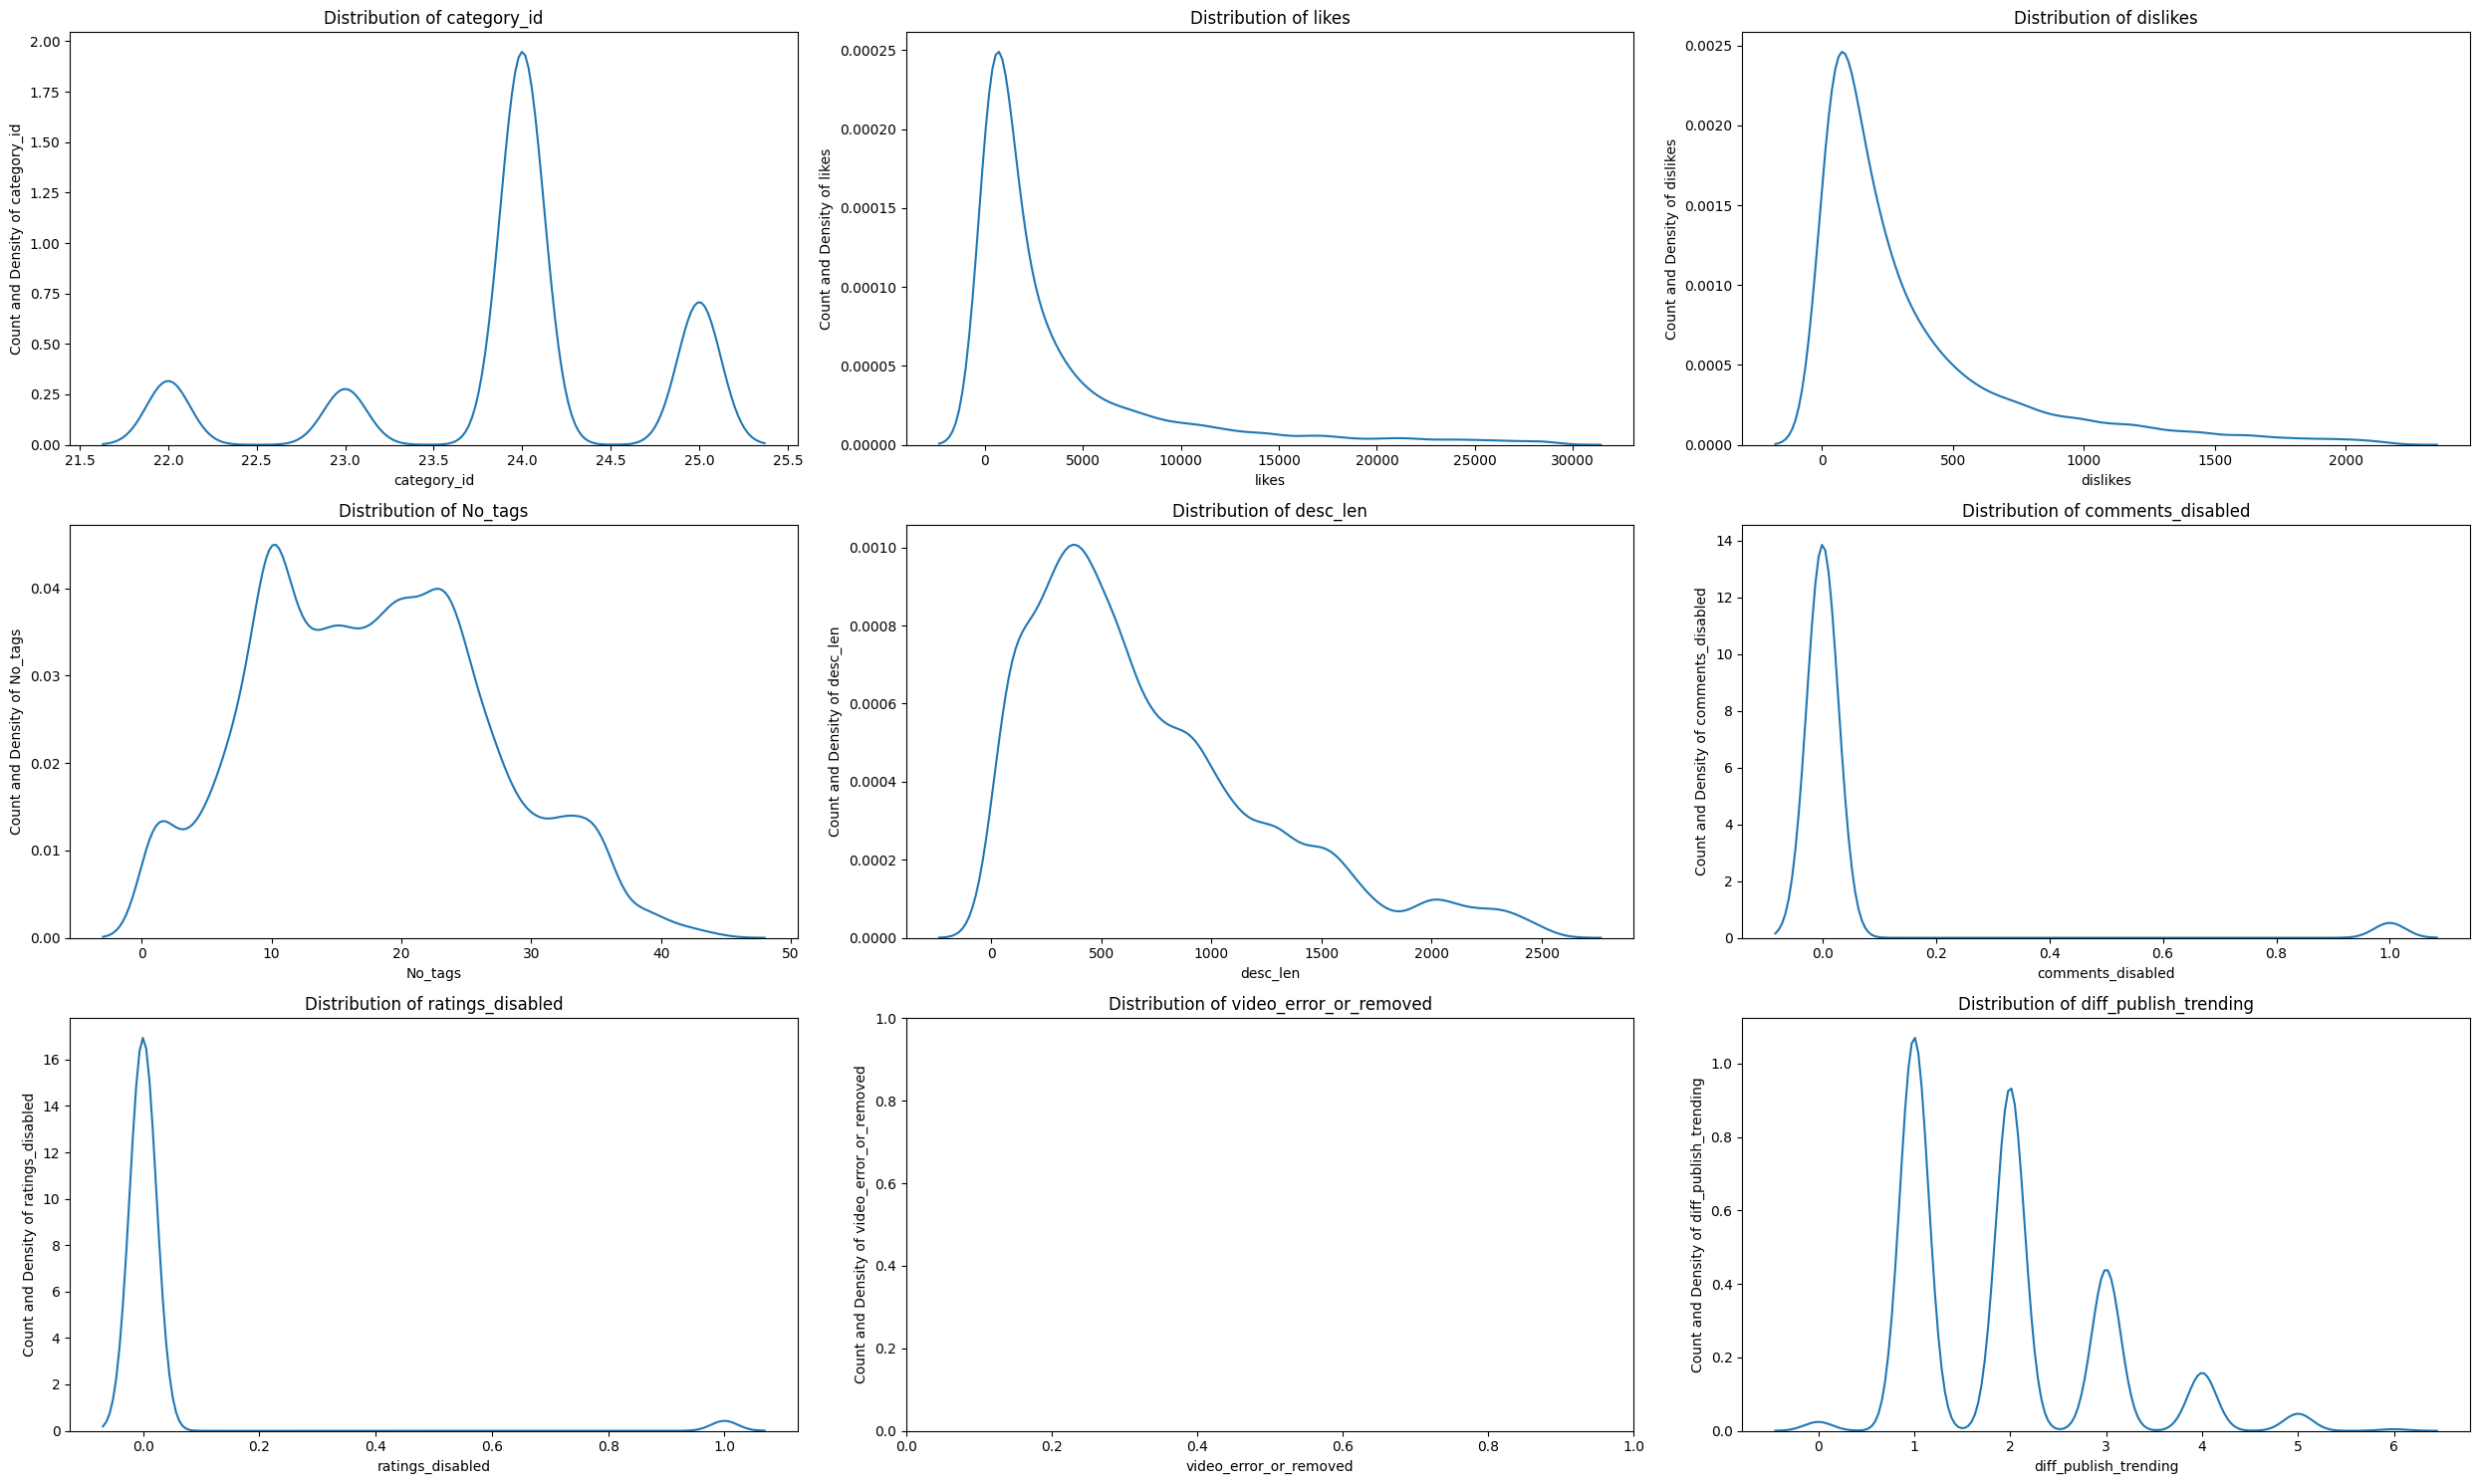

In [131]:
# Checking distribution before scaling
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,15))
axes = axes.flatten()

for i in range(len(x_train.columns)) :
    sns.kdeplot(ax=axes[i], x=x_train[x_train.columns[i]])
    axes[i].set_title(f'Distribution of {x_train.columns[i]}')
    axes[i].set_ylabel(f'Count and Density of {x_train.columns[i]}')
    axes[i].set_xlabel(f'{x_train.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(x_train.columns) < len(axes) :
    axes[len(x_train.columns)].remove()

plt.tight_layout()

Scaling will not be done to all features, but only to features with have large numbers such as likes, dislikes, and desc_len, also the frequency encoded binary columns if we use them

In [132]:
#Normalization (MinMaxScaller)
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

# columns_to_scale = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']

columns_to_scale = ['likes', 'dislikes', 'No_tags', 'desc_len']

scale_features = x_train[columns_to_scale]
for n in scale_features:
  x_train[n] = ms.fit_transform(x_train[[n]])
  x_test[n] = ms.fit_transform(x_test[[n]])
  # scaler.to_pickle(filename)

In [133]:
# #Standardization (Z-score normalization)
# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()

# columns_to_scale = ['likes', 'dislikes', 'No_tags', 'desc_len']

# scale_features = x_train[columns_to_scale]
# for n in scale_features:
#   x_train[n] = ss.fit_transform(x_train[[n]])
#   x_test[n] = ss.fit_transform(x_test[[n]])
#   # scaler.to_pickle(filename)

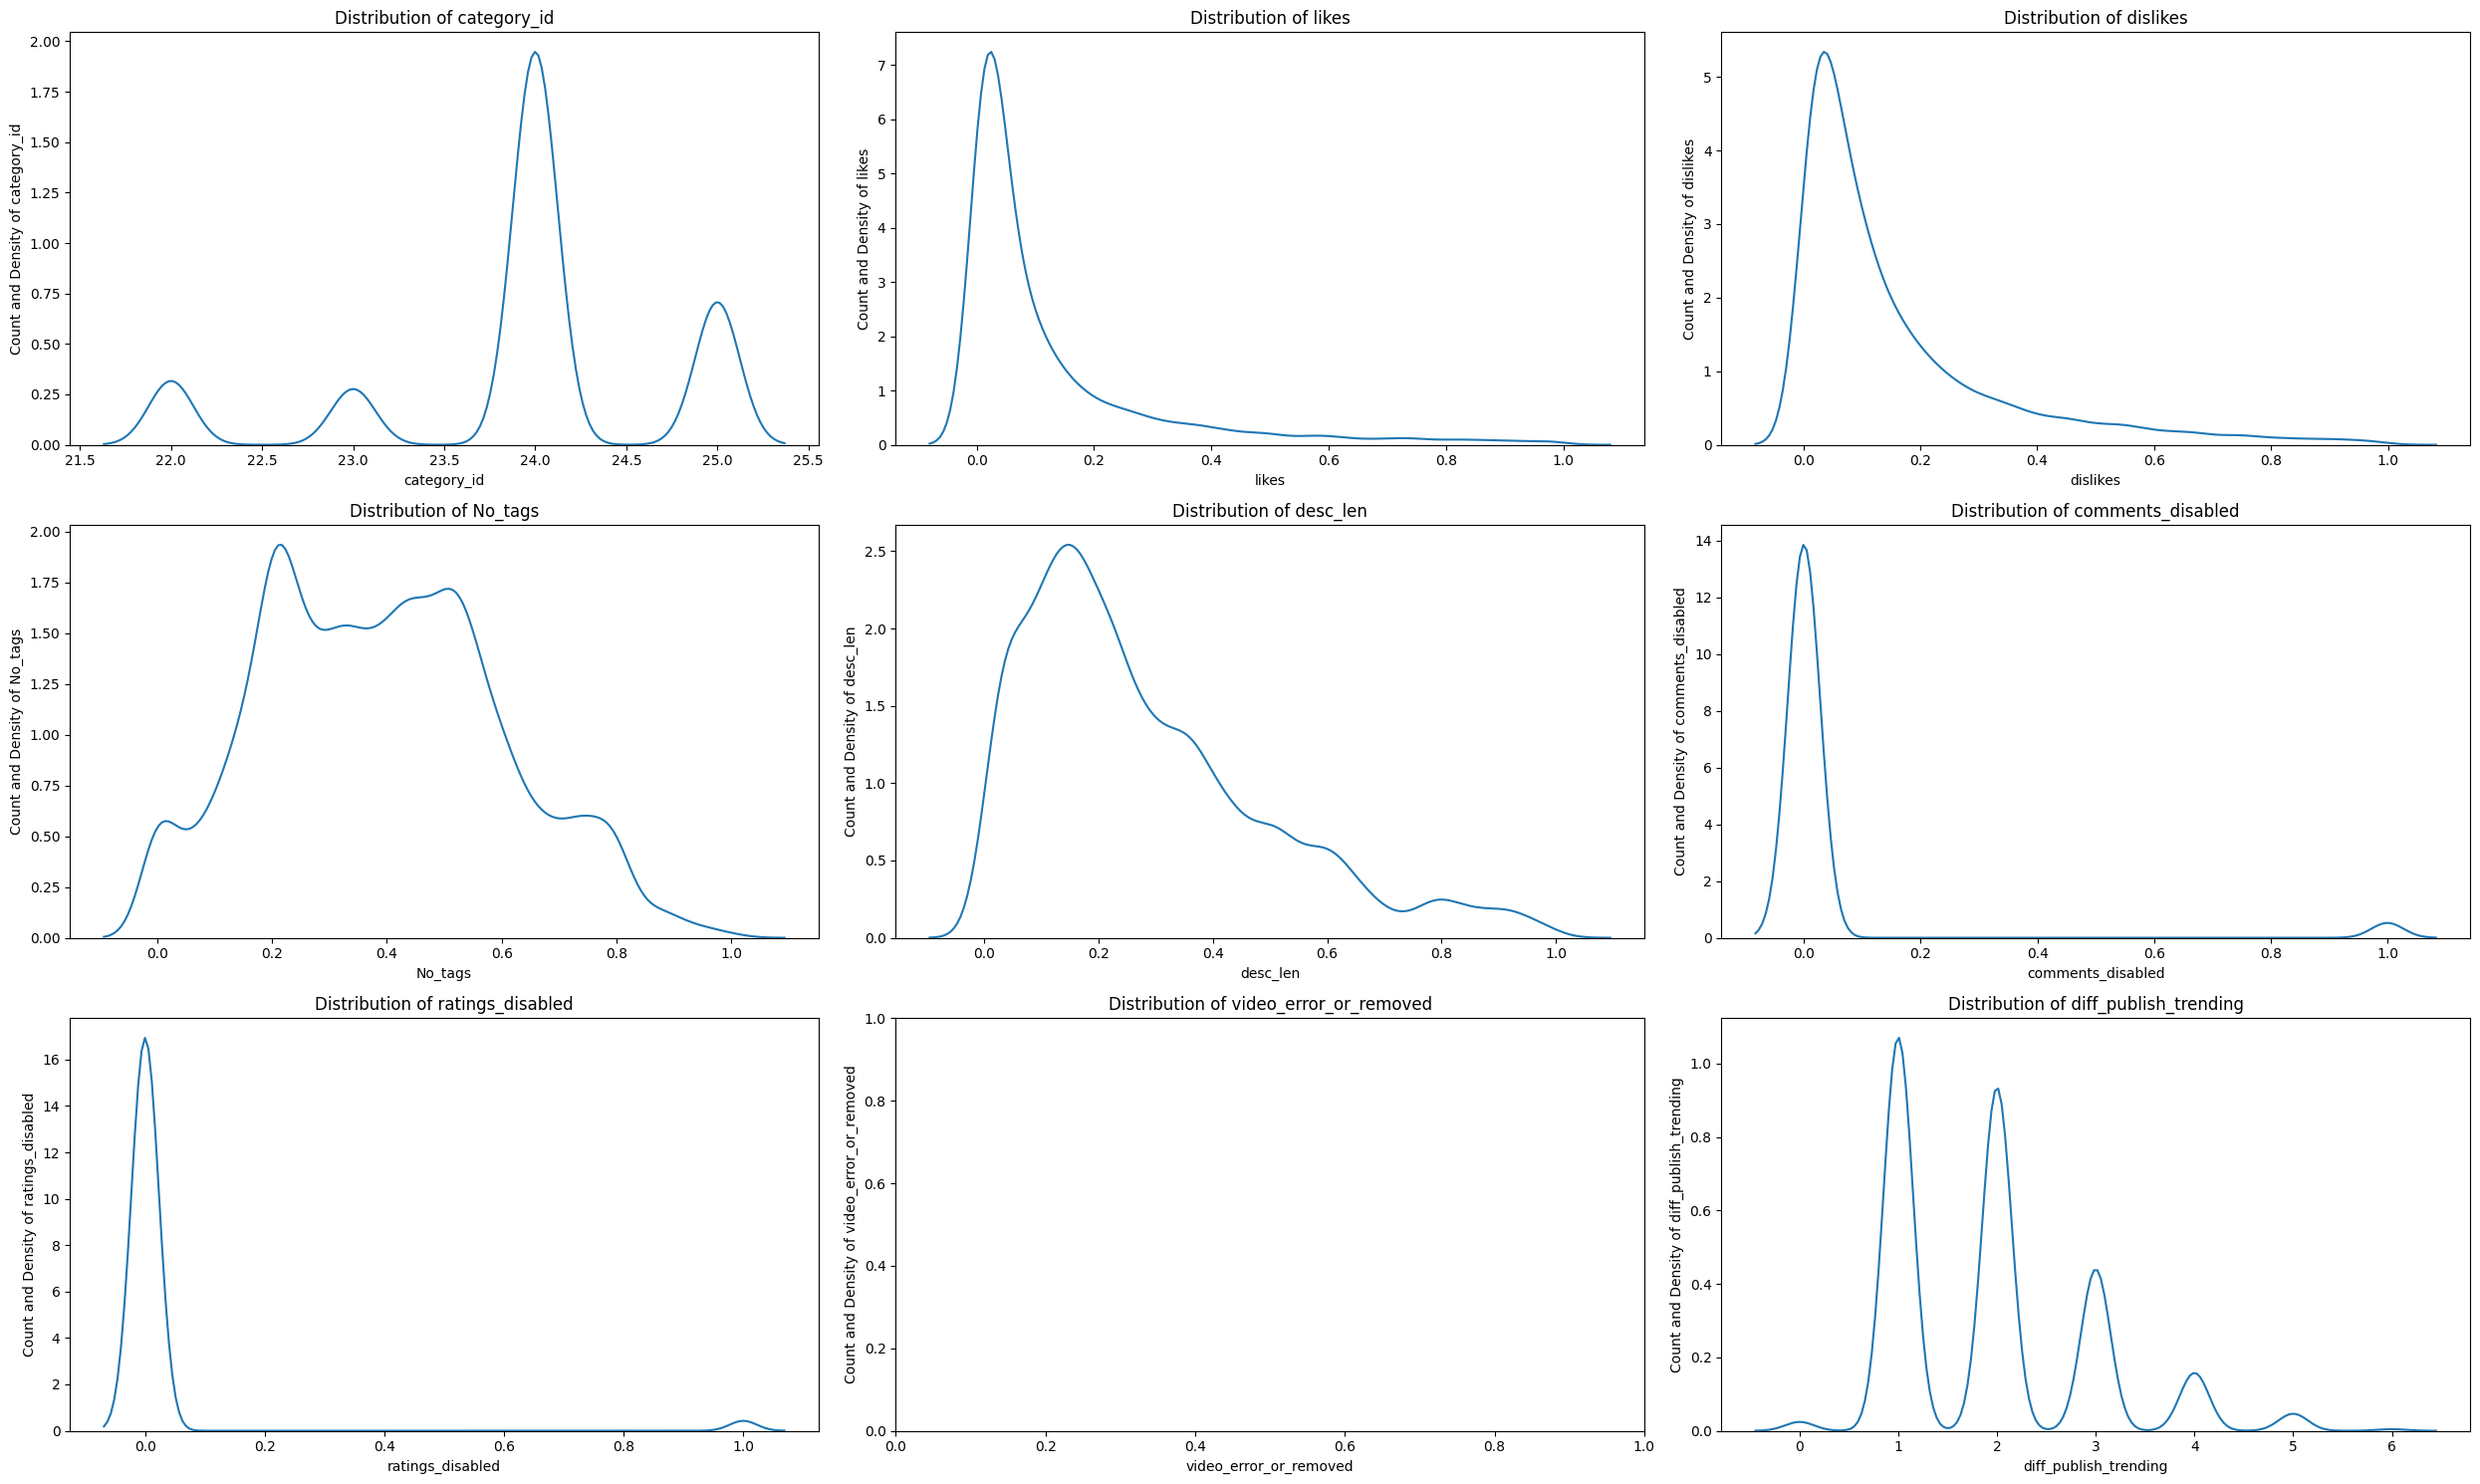

In [134]:
# Checking distribution before scaling
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,15))
axes = axes.flatten()

for i in range(len(x_train.columns)) :
    sns.kdeplot(ax=axes[i], x=x_train[x_train.columns[i]])
    axes[i].set_title(f'Distribution of {x_train.columns[i]}')
    axes[i].set_ylabel(f'Count and Density of {x_train.columns[i]}')
    axes[i].set_xlabel(f'{x_train.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(x_train.columns) < len(axes) :
    axes[len(x_train.columns)].remove()

plt.tight_layout()

# Modelling

## Train Regression Models

In [135]:
len(x_train)

14085

In [136]:
len(y_train)

14085

In [137]:
len(x_test)

9769

In [138]:
len(y_test)

9769

In [139]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [140]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)

Ridge()

In [141]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)

Lasso()

In [142]:
# Elastic Net Regression
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(x_train, y_train)

ElasticNet()

In [143]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [144]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [145]:
# Support Vector Regression
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [146]:
# Boosting : AdaBoost Regression
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(x_train, y_train)

AdaBoostRegressor()

In [147]:
# Boosting : XGBoost Regression
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Model Evaluation

In [148]:
#Import metrics score that will be evalueated
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

#Function for model evaluation metrics score
def eval_regression(model):
  y_pred = model.predict(x_test)
  y_pred_train = model.predict(x_train)

  # print('MAE (train): ' + str(mean_absolute_error(y_test, y_pred_train)))
  print('MAE (test): ' + str(mean_absolute_error(y_test, y_pred)))

  # print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))
  print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))

  # print('MAPE (train): ' + str(mean_absolute_percentage_error(y_train, y_pred_train)))
  print('MAPE (test): ' + str(mean_absolute_percentage_error(y_test, y_pred)))

  # print('R2 (train): ' + str(r2_score(y_train, y_pred_train)))
  print('R2 (test): ' + str(r2_score(y_test, y_pred)))

  #Cross Validation
  score = cross_validate(model, x_train, y_train, cv=5, scoring='r2', return_train_score=True) #scoring change based on what metrics we want to validate (usually choose the main performance metric)
  print('R2 Score (crossval train): '+ str(score['train_score'].mean()))
  print('R2 Score (crossval test): '+ str(score['test_score'].mean()))


In [149]:
#Printing metrics score for all models to compare

#Linear Regression
print('\nEvaluate LinearRegression')
eval_regression(lr)

#Ridge Regressor
print('\nEvaluate RidgeRegression')
eval_regression(ridge)

#Lasso Regressor
print('\nEvaluate LassoRegression')
eval_regression(lasso)

#Elastic Net Regressor
print('\nEvaluate ElasticNetRegression')
eval_regression(elasticnet)

#Decision Tree Regressor
print('\nEvaluate DecisionTreeRegressor')
eval_regression(dt)

#Random Forest Regressor
print('\nEvaluate RandomForestRegressor')
eval_regression(rf)

#Support Vector Regressor
print('\nEvaluate SVR')
eval_regression(svr)

#AdaBoost Regressor
print('\nEvaluate AdaBoostRegressor')
eval_regression(ab)

#XGBoost Regressor
print('\nEvaluate XGBRegressor')
eval_regression(xg)


Evaluate LinearRegression
MAE (test): 933477.565892739
RMSE (test): 3430039.619218896
MAPE (test): 0.854517985141905
R2 (test): -0.044260199290693025
R2 Score (crossval train): 0.5137723740315183
R2 Score (crossval test): 0.5130264814577281

Evaluate RidgeRegression
MAE (test): 933151.055142489
RMSE (test): 3429867.495536265
MAPE (test): 0.8537529220194654
R2 (test): -0.0441553973517983
R2 Score (crossval train): 0.5137693841275404
R2 Score (crossval test): 0.5130319830917238

Evaluate LassoRegression
MAE (test): 933470.8755499049
RMSE (test): 3430039.961119312
MAPE (test): 0.8544694498708154
R2 (test): -0.04426040747080395
R2 Score (crossval train): 0.5137723727642094
R2 Score (crossval test): 0.5130265172603146

Evaluate ElasticNetRegression
MAE (test): 873890.6498183068
RMSE (test): 3376951.5775277163
MAPE (test): 1.5674729881889002
R2 (test): -0.012185518189509414
R2 Score (crossval train): 0.19880762723692913
R2 Score (crossval test): 0.19878498982377749

Evaluate DecisionTreeReg

### Feature Importance in Linear Models

In [150]:
#Check features
x_train.columns

Index(['category_id', 'likes', 'dislikes', 'No_tags', 'desc_len',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'diff_publish_trending'],
      dtype='object')

In [151]:
#Initialize series of coef
lr_coef = pd.Series(lr.coef_)
ridge_coef = pd.Series(ridge.coef_)
lasso_coef = pd.Series(lasso.coef_)
elasticnet_coef = pd.Series(elasticnet.coef_)

# Creating a DataFrame with coefficients
linear_model_coef = pd.DataFrame({'lr_coef': lr_coef, 'ridge_coef': ridge_coef, 'lasso_coef': lasso_coef, 'elasticnet_coef': elasticnet_coef})

# Display coef DataFrame
linear_model_coef

lr_coef    ridge_coef    lasso_coef  elasticnet_coef
0 -9.699690e+03 -9.693359e+03 -9.698076e+03    -17635.832669
1  2.646811e+05  2.659073e+05  2.646684e+05     51735.878078
2  1.133529e+06  1.130053e+06  1.133502e+06     76177.213363
3  6.094618e+04  6.100839e+04  6.092699e+04     15358.523247
4  9.532578e+04  9.520782e+04  9.530498e+04     10573.127484
5 -1.367620e+04 -1.330905e+04 -1.363618e+04       864.686607
6  2.471992e+05  2.459486e+05  2.471362e+05      1705.933556
7  0.000000e+00  0.000000e+00  0.000000e+00         0.000000
8  7.064669e+04  7.081709e+04  7.064747e+04     93791.270901

# Summary of Models Generated by Various Machine Learning Algorithms

Experiment was conducted on the models below :

1. Linear Regression (with regularization : Ridge, Lasso, and Elastic Net)
2. Decision Tree Regression
3. Random Forest Regression
4. Support Vector Regression
5. Gradient Boosting Regression (AdaBoost and XGBoost)

From all of the models, the best results were obtained by:

- **Random Forest Regression**
- **XGBoost Regression**

Therefore, hyperparameter tuning can be applied to these two models to slightly improve their results (for other models that also have decent performance, experiments will be conducted if there is time and additional resources available).

## Feature Importances from Regression Models

In [152]:
#Function for model feature importance score
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature importance score')

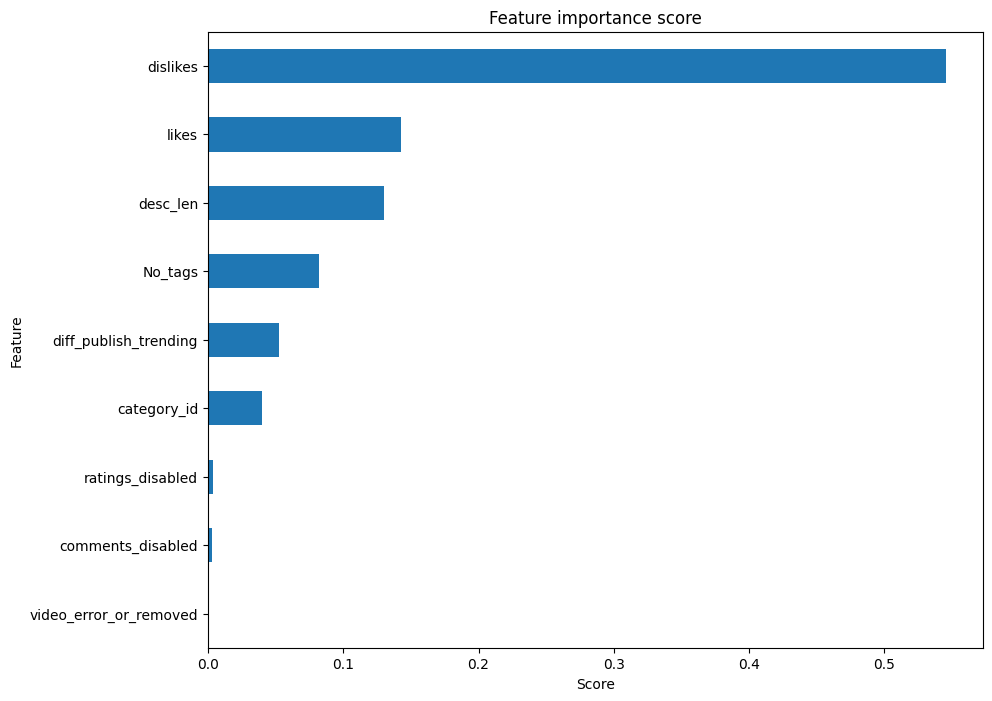

In [153]:
# Feature importance in random forest
show_feature_importance(rf)

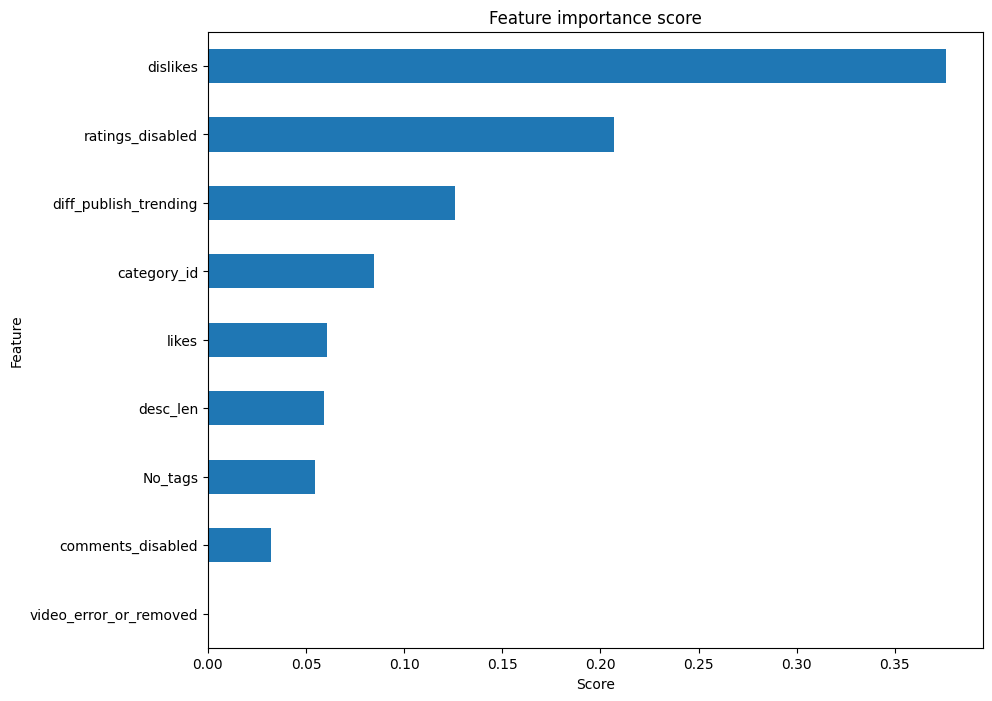

In [154]:
# Feature importance in XGB
show_feature_importance(xg)

## Hyperparameter Tuning

In [155]:
#Function for best hyperparameters found during the tuning process
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Hyperparameter Tuning For Random Forest Regression

<b>Commonly tuned hyperparameters in Random Forest:</b> (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html'>Sklearn Random Forest Documentation</a>)

- n_estimators: the number of trees to be built in the forest.
- max_samples: the maximum number of samples to be drawn from the total training set for building each tree (after the bootstrap process).

The remaining hyperparameters are the same as in Decision Trees:

- criterion: the method used to measure impurity in features (gini, entropy). This is for classification; for regression, it's different. It determines which feature becomes the root/node (squared_error, poisson).
- max_depth: the maximum depth of each tree to prevent overfitting.
- min_sample_split: the minimum number of samples required at a node to create a new leaf (to avoid having too few samples, which can lead to overfitting).
- min_sample_leaf: the minimum number of samples required in a leaf for the leaf to be formed (to avoid having too few samples, which can lead to overfitting).
- ccp_alpha: if the cost/error of a leaf/subtree is greater than ccp_alpha, that subtree will be pruned, minimizing the error/variance of the model.

In [156]:
# Hyperparameter Tuning for random forest
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Initiate hyperparameters used and their values
n_estimators = [int(x) for x in np.linspace(50, 180, 5)]
criterion = ['squared_error', 'poisson']
max_depth = [int(x) for x in np.linspace(50, 180, 5)]
min_samples_split = [int(x) for x in np.linspace(2, 10, 2)]
min_samples_leaf = [int(x) for x in np.linspace(2, 10, 2)]

#Collecting all hyperparameters into a single dictionary
hyperparameters = dict(n_estimators=n_estimators, 
                       criterion=criterion, 
                       max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf)

#Initiate tuned model
rf = RandomForestRegressor()
# rf_tuned = GridSearchCV(dt, hyperparameters, cv=5, scoring='r2')
rf_tuned = RandomizedSearchCV(rf, hyperparameters, scoring='r2', cv=5, error_score='raise')
rf_tuned.fit(x_train, y_train)

#Tuned model evaluation
eval_regression(rf_tuned)

MAE (test): 1022868.7072935404
RMSE (test): 3488912.054995051
MAPE (test): 1.0114587826009092
R2 (test): -0.08041473215988959
R2 Score (crossval train): 0.9092824721714837
R2 Score (crossval test): 0.6464966308830362


In [157]:
# Best hyperparameter in random forest
show_best_hyperparameter(rf_tuned)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'poisson', 'max_depth': 115, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 147, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [158]:
# Retrieving the best hyperparameters for random forest (similar to show_best_hyperparameter code before, but only shows the ones that we used)
best_params = rf_tuned.best_params_
best_params

{'n_estimators': 147,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 115,
 'criterion': 'poisson'}

In [159]:
# #Learning curve for hyperparameters

# # Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# # param_values = [int(x) for x in np.linspace(50, 180, 5)] # n_estimators
# # param_values = [int(x) for x in np.linspace(50, 180, 5)] # max_depth
# # param_values = [int(x) for x in np.linspace(2, 10, 2)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 10, 2)] # min_samples_leaf

# train_scores = []
# test_scores = []

# for i in param_values:
#     model = RandomForestRegressor(min_samples_leaf=i) # Change based on what hyperparameter that we used
#     model.fit(x_train, y_train)

#     # eval on train
#     y_pred_train_proba = model.predict_proba(x_train)
#     train_r2 = r2_score(y_train, y_pred_train_proba[:,1])
#     train_scores.append(train_r2)

#     # eval on test
#     y_pred_proba = model.predict_proba(x_test)
#     test_r2 = r2_score(y_test, y_pred_proba[:,1])
#     test_scores.append(test_r2)

#     print('Param value: ' + str(i) + '; train: ' + str(train_r2) + '; test: '+ str(test_r2))

# plt.title('Learning Curve | Hyperparameter : min_sample_leaf | Random Forest') # Change based on what hyperparameter that we used
# plt.ylabel('R2 Score')
# plt.xlabel('min_sample_leaf') # Change based on what hyperparameter that we used
# plt.plot(param_values, train_scores, label='Train')
# plt.plot(param_values, test_scores, label='Test')
# plt.legend()
# plt.show()

### Hyperparameter Tuning For XGBoost Regression

<b>Commonly tuned hyperparameters in XGBoost:</b>  (<a href='https://xgboost.readthedocs.io/en/latest/parameter.html'>XGBoost Documentation</a>)

- <b>Tree architecture-related:</b>
    - max_depth: the maximum depth of the tree to prevent overfitting.
    - min_child_weight: the minimum weight (or the number of samples if the total weight equals 1) a node should have to create a new leaf (to avoid having too few, causing overfitting).
    - gamma: the minimum loss/error reduction required to make a new leaf.
    - tree_method: the method XGBoost uses to build a tree. The algorithm we are learning is tree_method = exact. Other references can be found <a href='https://xgboost.readthedocs.io/en/latest/treemethod.html'>here</a>.

- <b>Boosting process subsampling:</b> Instead of using the entire training data in each iteration, we can use a sample in each iteration.
    - subsample: how much of the row samples to be used for sampling at each step. 1 for all rows.
    - colsample_bytree: how many features to be used. 1 for all features.

- <b>Control learning rate:</b>
    - eta: the step size for updating the feature weight in XGBoost, value range: 0-1. Smaller eta provides more fine-grained corrections but requires more boosting iterations.
        - In sklearn, the hyperparameter name is learning_rate.

- <b>Regularization in XGBoost:</b>
    - lambda: the regularization term on L2 norm.
    - alpha: the regularization term on L1 norm.

- <b>Learning task in XGBoost:</b>
    - objective: the objective function used, such as calculating error in regression.
    - eval_metric: evaluation metrics used on the validation data (e.g., rmse, mae, auc).
    - seed: random state.

- <b>Others:</b>
    - scale_pos_weight: if the data is imbalanced, this parameter is used to adjust the weight of each label.
    
- <b>Other parameters for model checking and debugging:</b>
    - verbose: to display detailed log information during the model training. 0: no messages; 1: display warnings only; 2: display info (deprecated examples); 3: debug: detailed training information for the model.

In [160]:
#Hyperparameter tuning for xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Initiate hyperparameters used and their values
max_depth = [int(x) for x in np.linspace(5, 20, 11)]
min_child_weight = [int(x) for x in np.linspace(1, 20, 11)]
gamma = [float(x) for x in np.linspace(0, 3, num = 11)]
tree_method = ['auto', 'exact', 'approx']

colsample_bytree = [float(x) for x in np.linspace(0, 1, 11)]
eta = [float(x) for x in np.linspace(0, 1, num = 100)]

# lambda = [float(x) for x in np.linspace(0, 1, 11)]
alpha = [float(x) for x in np.linspace(0, 1, 11)]

#Collecting all hyperparameters into a single dictionary
hyperparameters = dict(max_depth=max_depth, 
                       min_child_weight=min_child_weight, 
                       gamma=gamma,
                       tree_method=tree_method,
                       colsample_bytree=colsample_bytree,
                       eta=eta,
                       alpha=alpha)

#Initiate tuned model
xg = XGBRegressor()
# xg_tuned = GridSearchCV(xg, hyperparameters, cv=5, scoring='r2')
xg_tuned = RandomizedSearchCV(xg, hyperparameters, scoring='r2', cv=5, error_score='raise')
xg_tuned.fit(x_train,y_train)

# Evaluation
eval_regression(xg_tuned)

MAE (test): 974084.749711702
RMSE (test): 3449494.6494046873
MAPE (test): 0.9762588136349346
R2 (test): -0.05613978786784024
R2 Score (crossval train): 0.9894616695304567
R2 Score (crossval test): 0.6651536470830477


In [161]:
# Best hyperparameter in xgb
show_best_hyperparameter(xg_tuned)

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6000000000000001, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 2.4, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 12, 'max_leaves': None, 'min_child_weight': 2, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': 'auto', 'validate_parameters': None, 'verbosity': None, 'eta': 0.25252525252525254, 'alpha': 0.7000000000000001}


In [162]:
# Retrieving the best hyperparameters for xgb (similar to show_best_hyperparameter code before, but only shows the ones that we used)
best_params = xg_tuned.best_params_
best_params

{'tree_method': 'auto',
 'min_child_weight': 2,
 'max_depth': 12,
 'gamma': 2.4,
 'eta': 0.25252525252525254,
 'colsample_bytree': 0.6000000000000001,
 'alpha': 0.7000000000000001}

In [163]:
# #Learning curve for hyperparameters

# # Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# # param_values = [int(x) for x in np.linspace(5, 20, 11)] #max_depth
# # param_values = [int(x) for x in np.linspace(1, 20, 11)] #min_child_weight
# # param_values = [float(x) for x in np.linspace(0, 3, num = 11)] #gamma
# # param_values = ['auto', 'exact', 'approx'] #tree_method
# # param_values = [float(x) for x in np.linspace(0, 1, 11)] #colsample_bytree
# # param_values = [float(x) for x in np.linspace(0, 1, 100)] #eta
# # param_values = [float(x) for x in np.linspace(0, 1, 11)] #lambda
# param_values = [float(x) for x in np.linspace(0, 1, 11)] #alpha

# train_scores = []
# test_scores = []

# for i in param_values:
#     model = XGBRegressor(alpha=i) # Change based on what hyperparameter that we used
#     model.fit(x_train, y_train)

#     # eval on train
#     y_pred_train_proba = model.predict_proba(x_train)
#     train_r2 = r2_score(y_train, y_pred_train_proba[:,1])
#     train_scores.append(train_r2)

#     # eval on test
#     y_pred_proba = model.predict_proba(x_test)
#     test_r2 = r2_score(y_test, y_pred_proba[:,1])
#     test_scores.append(test_r2)

#     print('Param value: ' + str(i) + '; train: ' + str(train_r2) + '; test: '+ str(test_r2))

# plt.title('Learning Curve | Hyperparameter : alpha | XGB') # Change based on what hyperparameter that we used
# plt.ylabel('AUC')
# plt.xlabel('alpha') # Change based on what hyperparameter that we used
# plt.plot(param_values, train_scores, label='Train')
# plt.plot(param_values, test_scores, label='Test')
# plt.legend()
# plt.show()

# Comparison of Results Before and After Hyperparameter Tuning

<b>Evaluate RandomForestRegressor</b>

A. Before Hyperparameter Tuning
* MAE (test): 1021036.5614667827
* RMSE (test): 3485366.206659861
* MAPE (test): 1.0215316900825628
* R2 (test): -0.07821975563639816
* R2 Score (crossval train): 0.9488219845968191
* R2 Score (crossval test): 0.6364193277017363

B. After Hyperparameter Tuning
* MAE (test): 1022868.7072935404
* RMSE (test): 3488912.054995051
* MAPE (test): 1.0114587826009092
* R2 (test): -0.08041473215988959
* R2 Score (crossval train): 0.9092824721714837
* R2 Score (crossval test): 0.6464966308830362

<b>Evaluate XGBRegressor</b>

A. Before Hyperparameter Tuning
* MAE (test): 1020255.7195691176
* RMSE (test): 3469513.3685860974
* MAPE (test): 1.059264924204318
* R2 (test): -0.06843371328519088
* R2 Score (crossval train): 0.928381855023904
* R2 Score (crossval test): 0.6798975826633034

B. After Hyperparameter Tuning
* MAE (test): 974084.749711702
* RMSE (test): 3449494.6494046873
* MAPE (test): 0.9762588136349346
* R2 (test): -0.05613978786784024
* R2 Score (crossval train): 0.9894616695304567
* R2 Score (crossval test): 0.6651536470830477

Further tuning need to be done, and we can also experiment with other combination of features in training